In [151]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [161]:
df = pd.ExcelFile('raw_data_file.xlsx')
print(df.sheet_names)
data = pd.read_excel('raw_data_file.xlsx', sheet_name='raw_data')
print(data.columns)


['raw_data', 'Lat_long(for ref)']
Index(['ID', 'Fulfillment Status', 'Accepts Marketing', 'Subtotal', 'Shipping',
       'Taxes', 'Total', 'Discount Code', 'Discount Amount', 'Shipping Method',
       'Created Date', 'Lineitem quantity', 'Product', 'Lineitem price',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Billing City', 'Billing Zip',
       'Billing Province', 'Shipping City', 'Shipping Zip',
       'Shipping Province', 'Risk Level', 'Source', 'Billing Province Name',
       'Shipping Province Name'],
      dtype='object')


In [162]:
print(data.dtypes)


ID                                      int64
Fulfillment Status                     object
Accepts Marketing                      object
Subtotal                              float64
Shipping                              float64
Taxes                                 float64
Total                                 float64
Discount Code                          object
Discount Amount                       float64
Shipping Method                        object
Created Date                   datetime64[ns]
Lineitem quantity                       int64
Product                                object
Lineitem price                          int64
Lineitem compare at price             float64
Lineitem sku                          float64
Lineitem requires shipping               bool
Lineitem taxable                         bool
Lineitem fulfillment status            object
Billing City                           object
Billing Zip                            object
Billing Province                  

In [163]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Optional: Display rows with any missing values
rows_with_missing_values = data[data.isnull().any(axis=1)]
print("\nRows with missing values:")
print(rows_with_missing_values)

# Optional: Count total number of rows with missing values
num_rows_with_missing = len(rows_with_missing_values)
print(f"\nTotal number of rows with missing values: {num_rows_with_missing}")


Missing values in each column:
ID                                  0
Fulfillment Status               4992
Accepts Marketing                4992
Subtotal                         4992
Shipping                         4992
Taxes                            4992
Total                            4992
Discount Code                  129696
Discount Amount                  4992
Shipping Method                 10800
Created Date                        0
Lineitem quantity                   0
Product                             0
Lineitem price                      0
Lineitem compare at price        5120
Lineitem sku                   135072
Lineitem requires shipping          0
Lineitem taxable                    0
Lineitem fulfillment status         0
Billing City                     5104
Billing Zip                      5088
Billing Province                 5008
Shipping City                    5104
Shipping Zip                     5056
Shipping Province                5040
Risk Level         

In [164]:
# Remove rows with missing values in the 'Total' column
data.dropna(subset=['Total'], inplace=True)

# Verify if the missing values have been removed
print("Missing values in the 'Total' column after removal:")
print(data['Total'].isnull().sum())


Missing values in the 'Total' column after removal:
0


In [165]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

unique count
ID                                 130080
Fulfillment Status                      2
Accepts Marketing                       2
Subtotal                                9
Shipping                                1
Taxes                                  16
Total                                  10
Discount Code                          73
Discount Amount                         5
Shipping Method                         1
Created Date                          202
Lineitem quantity                       5
Product                                62
Lineitem price                          1
Lineitem compare at price               1
Lineitem sku                            0
Lineitem requires shipping              1
Lineitem taxable                        2
Lineitem fulfillment status             2
Billing City                          712
Billing Zip                          1172
Billing Province                       35
Shipping City                         711
Shipping Zip                         1173
Shipping Province                      34
Risk Level                              2
Source                                  2
Billing Province Name                  35
Shipping Province Name                 34

In [167]:
data = data.drop(columns=['Fulfillment Status', 'Accepts Marketing',  'Shipping',
       'Taxes',  'Discount Code',  'Shipping Method',
        'Lineitem price',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Source',
        'Risk Level' 
        ])
data.head(3)

ID  Subtotal   Total  Discount Amount Created Date  Lineitem quantity  \
0   1    1999.0  1999.0              0.0   2020-12-05                  1   
1   2    1999.0  1999.0              0.0   2020-12-05                  1   
2   3    1999.0  1999.0              0.0   2020-12-05                  1   

                           Product Billing City Billing Zip Billing Province  \
0    The Ultimate Leggings - L-una    Bengaluru     '560064               KA   
1  The Ultimate Leggings - S-elene      Gurgaon     '122001               HR   
2    The Ultimate Leggings - L-una    Bangalore     '560072               KA   

  Shipping City Shipping Zip Shipping Province Billing Province Name  \
0     Bengaluru      '560064                KA             Karnataka   
1       Gurgaon      '122001                HR               Haryana   
2     Bangalore      '560072                KA             Karnataka   

  Shipping Province Name  
0              Karnataka  
1                Haryana  
2              Karnataka

In [168]:
duplicate_rows = data[data.duplicated()]
duplicate_rows.head()

Empty DataFrame
Columns: [ID, Subtotal, Total, Discount Amount, Created Date, Lineitem quantity, Product, Billing City, Billing Zip, Billing Province, Shipping City, Shipping Zip, Shipping Province, Billing Province Name, Shipping Province Name]
Index: []

In [169]:
data['Created Date'] = pd.to_datetime(data['Created Date'])
data.set_index('Created Date', inplace=True)

In [170]:
monthly_sales = data['Total'].resample('ME').sum()
weekly_data = data['Total'].resample('W-SUN').sum()
print(weekly_data.head(3))


Created Date
2020-12-06     287856.0
2020-12-13    2299648.0
2020-12-20    3706944.0
Freq: W-SUN, Name: Total, dtype: float64


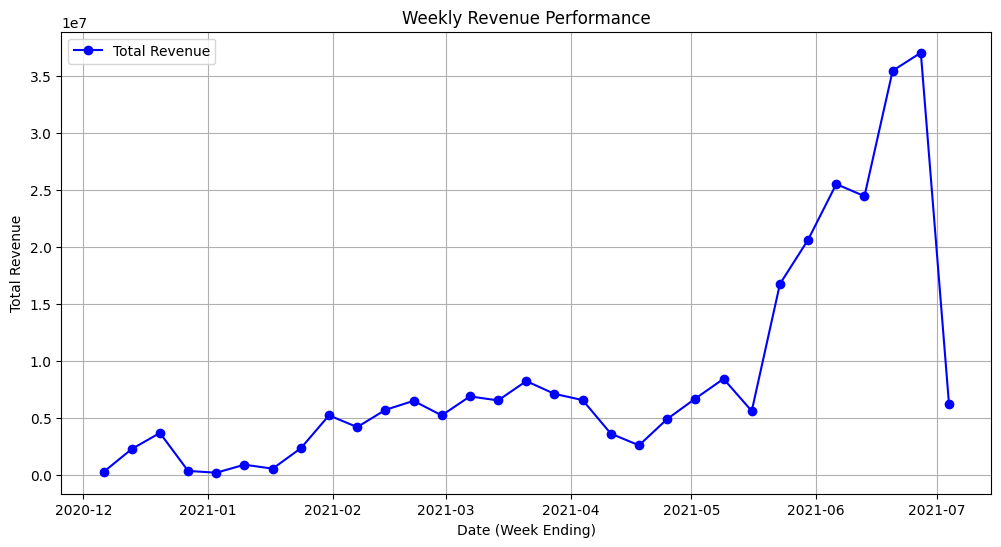

In [171]:
import matplotlib.pyplot as plt

# Ensure 'Total' is numeric
data['Total'] = pd.to_numeric(data['Total'], errors='coerce')

# Resample to weekly revenue (Sunday as the end of the week)
weekly_revenue = data['Total'].resample('W').sum()

# Plotting the weekly revenue
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data.values, marker='o', color='blue', linestyle='-', label='Total Revenue')
plt.title('Weekly Revenue Performance')
plt.xlabel('Date (Week Ending)')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.legend()
plt.show()



In [172]:
weekly_orders = data['ID'].resample('W-SUN').count()
weekly_aov = weekly_data / weekly_orders
print(weekly_aov)

Created Date
2020-12-06    1999.000000
2020-12-13    2024.338028
2020-12-20    2087.243243
2020-12-27    2171.636364
2021-01-03    1999.000000
2021-01-10    2066.821429
2021-01-17    2587.277143
2021-01-24    2054.527778
2021-01-31    2074.911392
2021-02-07    2028.215385
2021-02-14    2056.442529
2021-02-21    2057.050505
2021-02-28    2048.350000
2021-03-07    2126.522167
2021-03-14    2069.166667
2021-03-21    2103.844898
2021-03-28    2072.451163
2021-04-04    2110.738462
2021-04-11    2149.867925
2021-04-18    2048.975000
2021-04-25    2094.190476
2021-05-02    2163.865979
2021-05-09    2094.190476
2021-05-16    1997.863636
2021-05-23    2085.011952
2021-05-30    2045.958730
2021-06-06    2048.201799
2021-06-13    1996.647059
2021-06-20    2120.488506
2021-06-27    2177.437853
2021-07-04    1992.846154
Freq: W-SUN, dtype: float64


Weeks with Revenue Spikes:
Created Date
2020-12-13    698.888333
2020-12-20     61.196148
2021-01-10    313.571071
2021-01-24    308.388521
2021-01-31    121.621622
2021-02-14     35.708922
2021-03-07     31.716992
2021-04-25     87.804878
2021-05-02     36.363636
2021-05-23    197.669101
2021-06-20     44.935136
Name: Total, dtype: float64

Weeks with Revenue Dips:
Created Date
2020-12-27   -89.689405
2021-01-03   -41.422472
2021-01-17   -37.409272
2021-04-11   -44.633304
2021-05-16   -33.371231
2021-07-04   -83.195016
Name: Total, dtype: float64


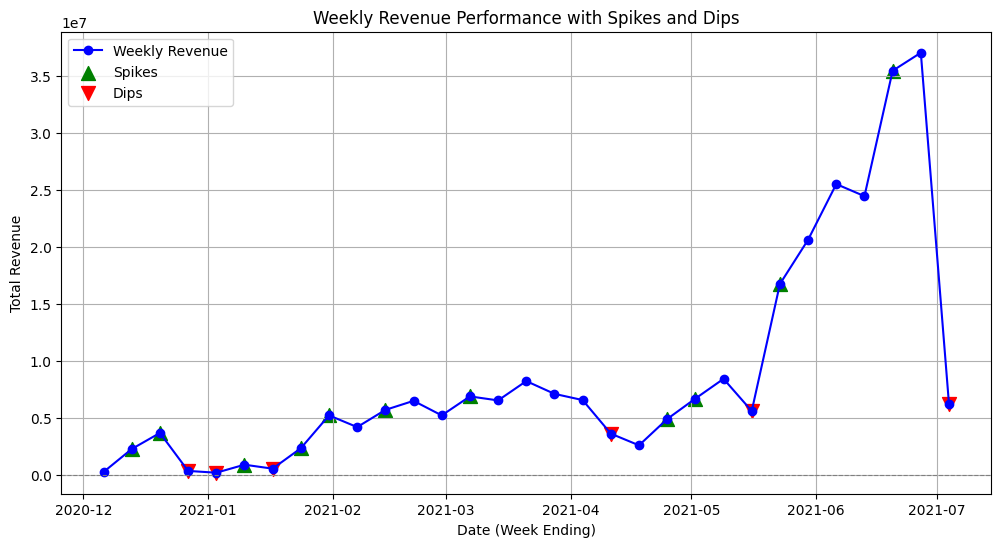

In [173]:
# Calculate WoW percentage change
weekly_data = data['Total'].resample('W-SUN').sum()
weekly_data_pct_change = weekly_data.pct_change() * 100

# Identify spikes and dips based on thresholds
spikes = weekly_data_pct_change[weekly_data_pct_change >= 30]
dips = weekly_data_pct_change[weekly_data_pct_change <= -30]

# Print the weeks with spikes and dips
print("Weeks with Revenue Spikes:")
print(spikes)

print("\nWeeks with Revenue Dips:")
print(dips)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data.values, marker='o', color='blue', label='Weekly Revenue')

# Highlight spikes
plt.scatter(spikes.index, weekly_data[spikes.index], color='green', label='Spikes', marker='^', s=100)

# Highlight dips
plt.scatter(dips.index, weekly_data[dips.index], color='red', label='Dips', marker='v', s=100)

# Add labels and legend
plt.title('Weekly Revenue Performance with Spikes and Dips')
plt.xlabel('Date (Week Ending)')
plt.ylabel('Total Revenue')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid()

plt.show()


In [217]:
# Filter data for spike and dip weeks
spike_weeks_data = data[data.index.isin(spikes.index)]
dip_weeks_data = data[data.index.isin(dips.index)]

# Analyze Product Contribution
spike_product_revenue = spike_weeks_data.groupby('Product')['Total'].sum().sort_values(ascending=False)
dip_product_revenue = dip_weeks_data.groupby('Product')['Total'].sum().sort_values(ascending=False)

# Analyze City Contribution
spike_city_revenue = spike_weeks_data.groupby('Shipping City')['Total'].sum().sort_values(ascending=False)
dip_city_revenue = dip_weeks_data.groupby('Shipping City')['Total'].sum().sort_values(ascending=False)

# Analyze Discounts
average_spike_discount = spike_weeks_data['Discount Amount'].mean()
average_dip_discount = dip_weeks_data['Discount Amount'].mean()

print("Top Products During Spikes:")
print(spike_product_revenue.head())

print("\nTop Products During Dips:")
print(dip_product_revenue.head())

print("\nTop Cities During Spikes:")
print(spike_city_revenue.head())

print("\nTop Cities During Dips:")
print(dip_city_revenue.head())

print("\nAverage Discount During Spikes: ", average_spike_discount)
print("Average Discount During Dips: ", average_dip_discount)

# Visualizations
import matplotlib.pyplot as plt
'''
# Product Contribution During Spikes
plt.figure(figsize=(10, 6))
spike_product_revenue.head(10).plot(kind='bar', color='green', alpha=0.7)
plt.title('Top 10 Products During Revenue Spikes')
plt.ylabel('Total Revenue')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

# Product Contribution During Dips
plt.figure(figsize=(10, 6))
dip_product_revenue.head(10).plot(kind='bar', color='red', alpha=0.7)
plt.title('Top 10 Products During Revenue Dips')
plt.ylabel('Total Revenue')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()
'''

Top Products During Spikes:
Product
The Ultimate Leggings - L-una                                             2972912.0
The Ultimate Leggings - XL-una                                            2238880.0
The Ultimate Leggings - M-aia                                             2110944.0
The Ultimate Leggings - Black - L-una                                     1055472.0
The Ultimate Leggings - Navy - L-una [PRE-ORDER: DISPATCH ON 1ST JULY]     767616.0
Name: Total, dtype: float64

Top Products During Dips:
Product
The Ultimate Leggings - XL-una                                   447776.0
The Ultimate Leggings - XXL-una                                  383808.0
The Ultimate Leggings - M-aia                                    223888.0
The Ultimate Leggings - L-una                                    191904.0
The Ultimate Leggings - L-una [ PRE-ORDER APRIL 12TH RESTOCK]    191904.0
Name: Total, dtype: float64

Top Cities During Spikes:
Shipping City
Mumbai       3006496.0
Bengaluru    111944

"\n# Product Contribution During Spikes\nplt.figure(figsize=(10, 6))\nspike_product_revenue.head(10).plot(kind='bar', color='green', alpha=0.7)\nplt.title('Top 10 Products During Revenue Spikes')\nplt.ylabel('Total Revenue')\nplt.xlabel('Product')\nplt.xticks(rotation=45)\nplt.grid(axis='y', linestyle='--', linewidth=0.7)\nplt.show()\n\n# Product Contribution During Dips\nplt.figure(figsize=(10, 6))\ndip_product_revenue.head(10).plot(kind='bar', color='red', alpha=0.7)\nplt.title('Top 10 Products During Revenue Dips')\nplt.ylabel('Total Revenue')\nplt.xlabel('Product')\nplt.xticks(rotation=45)\nplt.grid(axis='y', linestyle='--', linewidth=0.7)\nplt.show()\n"

In [ ]:
# 1. Maximum Discount
max_discount = data['Discount Amount'].max()

print("Maximum Discount Applied: ", max_discount)

# 2. Identify Major Spike Week
major_spike_week = spikes.idxmax()  # Week with the highest WoW percentage increase
print("Major Spike Week: ", major_spike_week)

# Filter data for the major spike week
major_spike_data = data[data.index.to_period('W') == major_spike_week.to_period('W')]

# Calculate discount statistics for the major spike week
total_discount_spike = major_spike_data['Discount Amount'].sum()
average_discount_spike = major_spike_data['Discount Amount'].mean()
max_discount_spike = major_spike_data['Discount Amount'].max()

# Compare with overall average discount
overall_avg_discount = data['Discount Amount'].mean()

print("\nDiscount Statistics During Major Spike Week:")
print(f"  Total Discount: {total_discount_spike}")
print(f"  Average Discount: {average_discount_spike}")
print(f"  Maximum Discount: {max_discount_spike}")
print("\nOverall Average Discount: ", overall_avg_discount)

# Insights
if average_discount_spike > overall_avg_discount:
    print("\nObservation: Discounts were higher than usual during the major spike week, indicating their possible contribution to the revenue spike.")
else:
    print("\nObservation: Discounts were not significantly higher during the major spike week, suggesting other factors drove the spike.")


Maximum Discount Applied:  3998.0
Major Spike Week:  2020-12-13 00:00:00

Discount Statistics During Major Spike Week:
  Total Discount: 3200.0
  Average Discount: 2.816901408450704
  Maximum Discount: 100.0

Overall Average Discount:  51.37810578105781

Observation: Discounts were not significantly higher during the major spike week, suggesting other factors drove the spike.


In [242]:
# 1. Identify Major Dip Week
major_dip_week = dips.idxmin()  # Week with the highest WoW percentage decrease
print("Major Dip Week: ", major_dip_week)

# Filter data for the major dip week
major_dip_data = data[data.index.to_period('W') == major_dip_week.to_period('W')]

# Calculate discount statistics for the major dip week
total_discount_dip = major_dip_data['Discount Amount'].sum()
average_discount_dip = major_dip_data['Discount Amount'].mean()
max_discount_dip = major_dip_data['Discount Amount'].max()

# Compare with overall average discount
overall_avg_discount = data['Discount Amount'].mean()

print("\nDiscount Statistics During Major Dip Week:")
print(f"  Total Discount: {total_discount_dip}")
print(f"  Average Discount: {average_discount_dip}")
print(f"  Maximum Discount: {max_discount_dip}")
print("\nOverall Average Discount: ", overall_avg_discount)

# Insights
if average_discount_dip > overall_avg_discount:
    print("\nObservation: Discounts were higher than usual during the major dip week, which might have contributed to the revenue dip.")
else:
    print("\nObservation: Discounts were not significantly higher during the major dip week, suggesting other factors caused the dip.")


Major Dip Week:  2020-12-27 00:00:00

Discount Statistics During Major Dip Week:
  Total Discount: 1600.0
  Average Discount: 9.090909090909092
  Maximum Discount: 100.0

Overall Average Discount:  51.37810578105781

Observation: Discounts were not significantly higher during the major dip week, suggesting other factors caused the dip.


Top Cities During Spikes (Revenue):
Shipping City
Mumbai        3006496.0
Bengaluru     1119440.0
Bangalore      895552.0
Pune           735632.0
New Delhi      511744.0
Hyderabad      479760.0
Bangalore      447776.0
Gurgaon        447776.0
Chennai        415792.0
Delhi          319840.0
Name: Total, dtype: float64

Top Cities During Dips (Revenue):
Shipping City
Mumbai             351824.0
Bangalore          127936.0
New Delhi          127936.0
Noida               95952.0
Gurugram            95952.0
Pune                95952.0
Bengaluru           95952.0
Chikkamagaluru      63968.0
Ernakulam           63968.0
GURGAON             63968.0
Name: Total, dtype: float64


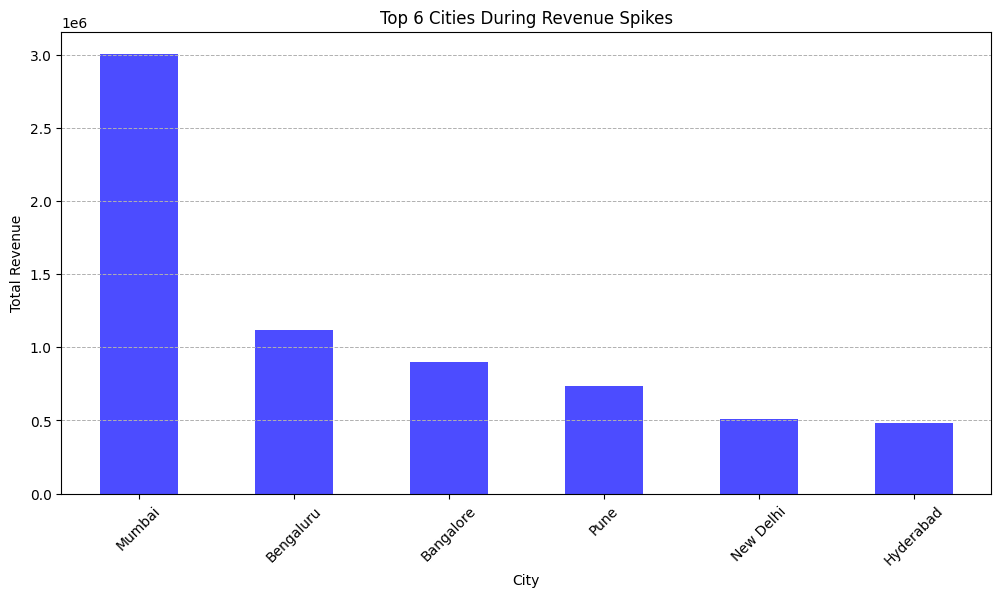

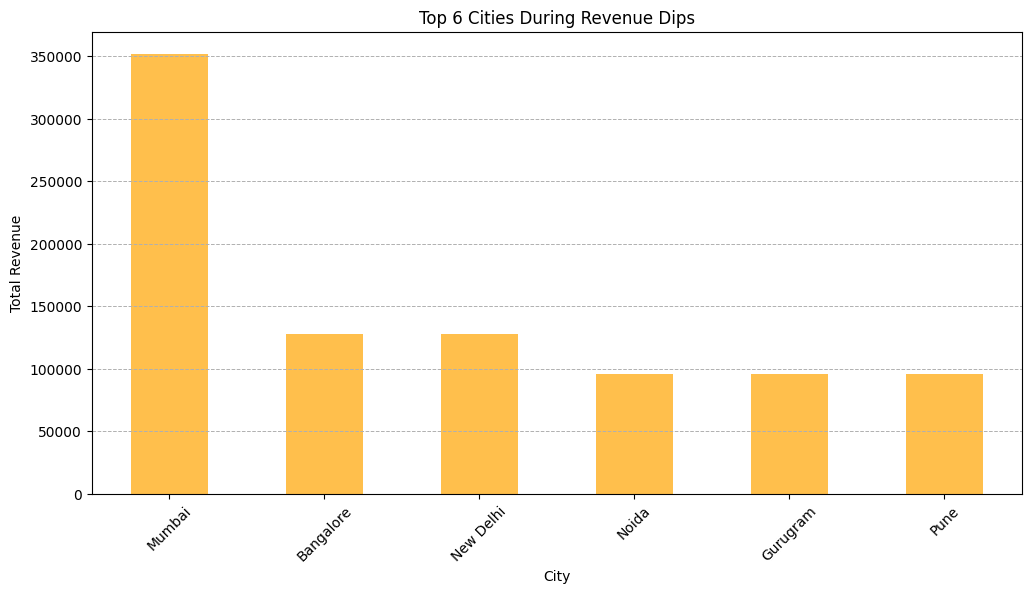

In [236]:
# Filter data for spike and dip weeks
spike_weeks_data = data[data.index.isin(spikes.index)]
dip_weeks_data = data[data.index.isin(dips.index)]

# Aggregate revenue by Shipping City
spike_city_revenue = spike_weeks_data.groupby('Shipping City')['Total'].sum().sort_values(ascending=False)
dip_city_revenue = dip_weeks_data.groupby('Shipping City')['Total'].sum().sort_values(ascending=False)

# Print Top Cities During Spikes
print("Top Cities During Spikes (Revenue):")
print(spike_city_revenue.head(10))

# Print Top Cities During Dips
print("\nTop Cities During Dips (Revenue):")
print(dip_city_revenue.head(10))

# Visualize Top Cities During Spikes
import matplotlib.pyplot as plt

# Visualize Top 6 Cities During Spikes
plt.figure(figsize=(12, 6))
spike_city_revenue.head(6).plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top 6 Cities During Revenue Spikes')
plt.ylabel('Total Revenue')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

# Visualize Top 6 Cities During Dips
plt.figure(figsize=(12, 6))
dip_city_revenue.head(6).plot(kind='bar', color='orange', alpha=0.7)
plt.title('Top 6 Cities During Revenue Dips')
plt.ylabel('Total Revenue')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()



Bottom 10 Cities During Spikes (Revenue):
Shipping City
Bagalore            30384.0
Ghaziabad           31984.0
Halasuru            31984.0
Hoskote             31984.0
Howrah              31984.0
Jodhpur             31984.0
Jodhpur             31984.0
Lonavala            31984.0
Mandi gobindgarh    31984.0
Mysuru              31984.0
Name: Total, dtype: float64

Bottom 10 Cities During Dips (Revenue):
Shipping City
Satara         31984.0
PANAJI         31984.0
Chandigarh     31984.0
Chennai        31984.0
Coimbatore     31984.0
Mumbai         31984.0
Mandla         31984.0
Nagpur         63968.0
Nagaon         63968.0
Mumbai         63968.0
Name: Total, dtype: float64


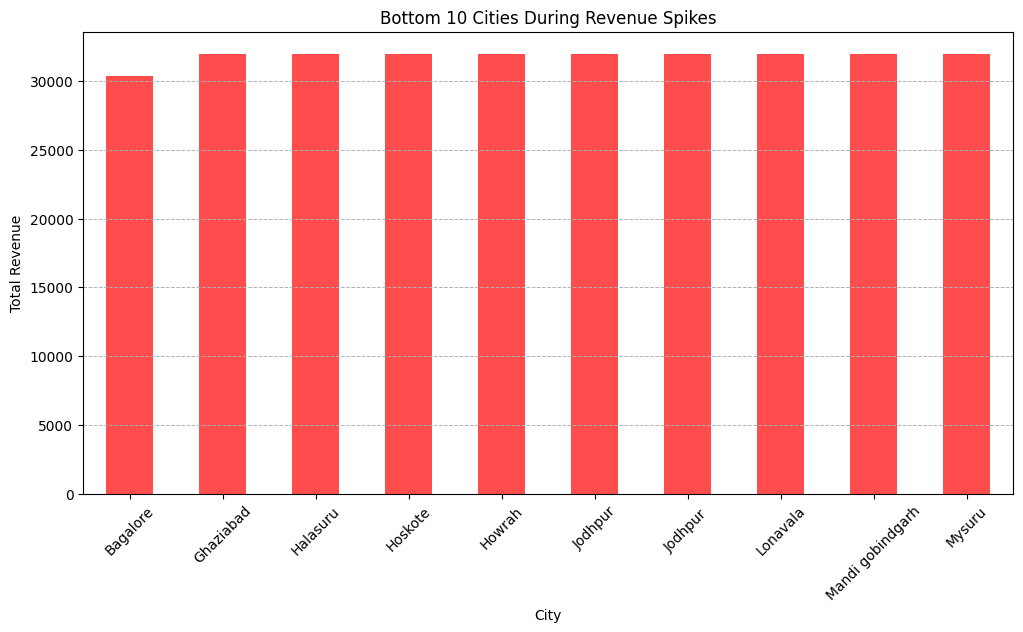

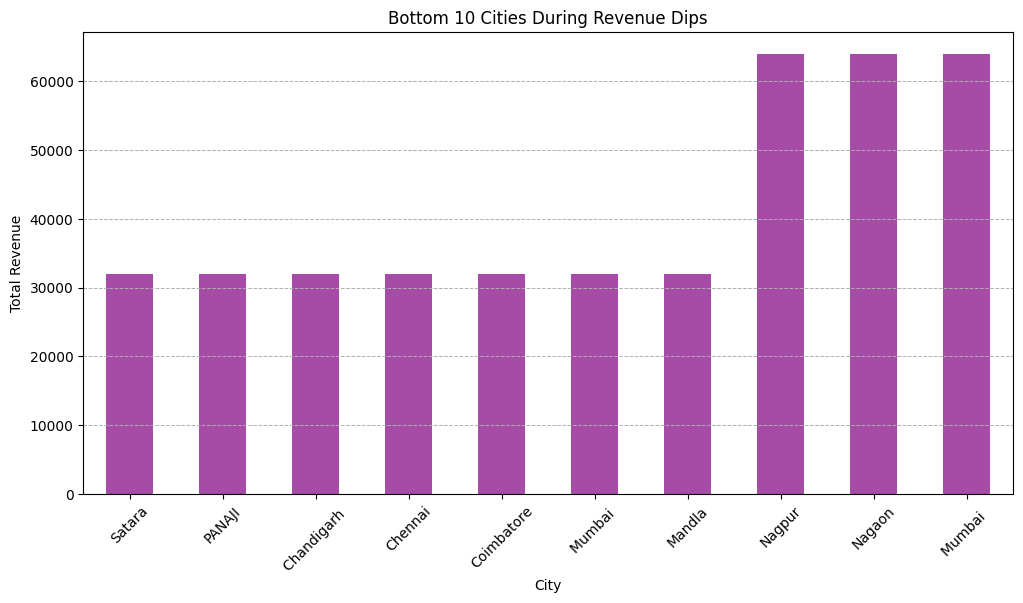

In [ ]:
# Bottom 10 Cities During Spikes
bottom_spike_city_revenue = spike_weeks_data.groupby('Shipping City')['Total'].sum().sort_values().head(10)
print("Bottom 10 Cities During Spikes (Revenue):")
print(bottom_spike_city_revenue)

# Bottom 10 Cities During Dips
bottom_dip_city_revenue = dip_weeks_data.groupby('Shipping City')['Total'].sum().sort_values().head(10)
print("\nBottom 10 Cities During Dips (Revenue):")
print(bottom_dip_city_revenue)

# Visualize Bottom 10 Cities During Spikes
plt.figure(figsize=(12, 6))
bottom_spike_city_revenue.plot(kind='bar', color='red', alpha=0.7)
plt.title('Bottom 10 Cities During Revenue Spikes')
plt.ylabel('Total Revenue')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

# Visualize Bottom 10 Cities During Dips
plt.figure(figsize=(12, 6))
bottom_dip_city_revenue.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Bottom 10 Cities During Revenue Dips')
plt.ylabel('Total Revenue')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


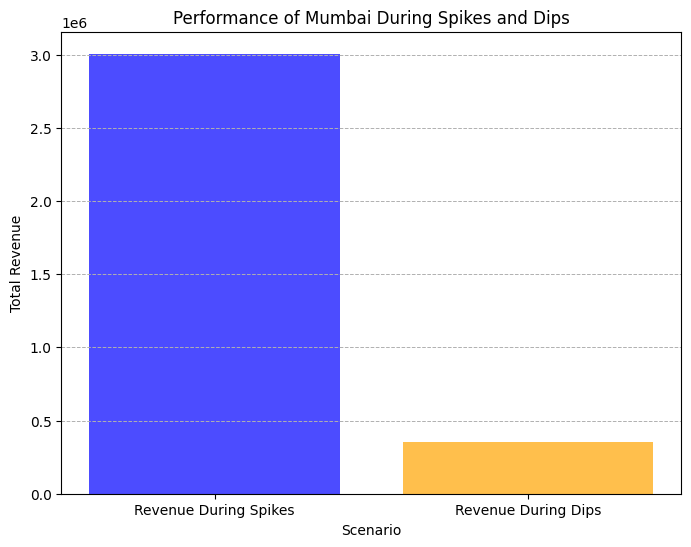

In [237]:
# Identify the best-performing city during spikes
best_city = spike_city_revenue.idxmax()  # Get the city with maximum revenue during spikes

# Extract revenue for the best-performing city during spikes and dips
best_city_spike_revenue = spike_city_revenue[best_city]
best_city_dip_revenue = dip_city_revenue.get(best_city, 0)  # Use `.get` to avoid KeyError if the city doesn't appear in dips

# Create data for the bar chart
comparison_data = {
    'Revenue During Spikes': best_city_spike_revenue,
    'Revenue During Dips': best_city_dip_revenue
}

# Plot the comparison chart
plt.figure(figsize=(8, 6))
plt.bar(comparison_data.keys(), comparison_data.values(), color=['blue', 'orange'], alpha=0.7)
plt.title(f'Performance of {best_city} During Spikes and Dips')
plt.ylabel('Total Revenue')
plt.xlabel('Scenario')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


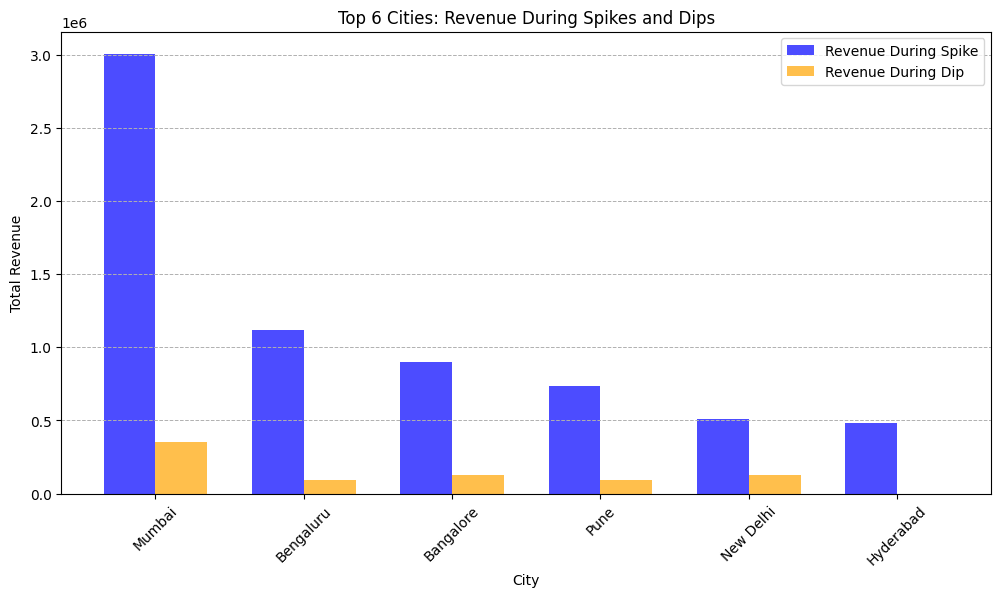

In [238]:
# Get the top 6 cities during spike weeks
top_6_cities = spike_city_revenue.head(6).index

# Extract revenue for the top 6 cities during spike and dip weeks
spike_revenues = spike_weeks_data[spike_weeks_data['Shipping City'].isin(top_6_cities)].groupby('Shipping City')['Total'].sum()
dip_revenues = dip_weeks_data[dip_weeks_data['Shipping City'].isin(top_6_cities)].groupby('Shipping City')['Total'].sum()

# Ensure all cities are included even if revenue is 0 during dips
spike_revenues = spike_revenues.reindex(top_6_cities, fill_value=0)
dip_revenues = dip_revenues.reindex(top_6_cities, fill_value=0)

# Create a grouped bar chart for comparison
x = np.arange(len(top_6_cities))  # X positions for the cities
width = 0.35  # Width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, spike_revenues, width, label='Revenue During Spike', color='blue', alpha=0.7)
plt.bar(x + width/2, dip_revenues, width, label='Revenue During Dip', color='orange', alpha=0.7)

# Add labels and title
plt.title('Top 6 Cities: Revenue During Spikes and Dips')
plt.ylabel('Total Revenue')
plt.xlabel('City')
plt.xticks(x, top_6_cities, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

Top 6 Cities: Revenue During Spikes and Dips
----------------------------------------
City           Spike Revenue  Dip Revenue    
----------------------------------------
Mumbai         3,006,496.00   351,824.00     
Bengaluru      1,119,440.00   95,952.00      
Bangalore      895,552.00     127,936.00     
Pune           735,632.00     95,952.00      
New Delhi      511,744.00     127,936.00     
Hyderabad      479,760.00     0.00           
----------------------------------------


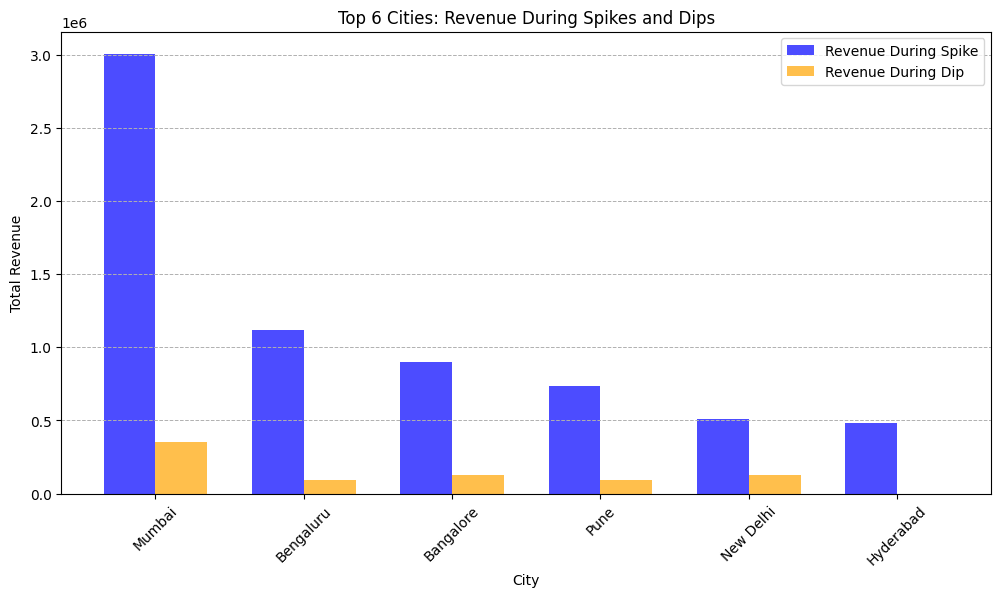

In [239]:
import numpy as np

# Get the top 6 cities during spike weeks
top_6_cities = spike_city_revenue.head(6).index

# Extract revenue for the top 6 cities during spike and dip weeks
spike_revenues = spike_weeks_data[spike_weeks_data['Shipping City'].isin(top_6_cities)].groupby('Shipping City')['Total'].sum()
dip_revenues = dip_weeks_data[dip_weeks_data['Shipping City'].isin(top_6_cities)].groupby('Shipping City')['Total'].sum()

# Ensure all cities are included even if revenue is 0 during dips
spike_revenues = spike_revenues.reindex(top_6_cities, fill_value=0)
dip_revenues = dip_revenues.reindex(top_6_cities, fill_value=0)

# Print the values in a table format
print("Top 6 Cities: Revenue During Spikes and Dips")
print("-" * 40)
print(f"{'City':<15}{'Spike Revenue':<15}{'Dip Revenue':<15}")
print("-" * 40)
for city in top_6_cities:
    print(f"{city:<15}{spike_revenues[city]:<15,.2f}{dip_revenues[city]:<15,.2f}")
print("-" * 40)

# Create a grouped bar chart for comparison
x = np.arange(len(top_6_cities))  # X positions for the cities
width = 0.35  # Width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, spike_revenues, width, label='Revenue During Spike', color='blue', alpha=0.7)
plt.bar(x + width/2, dip_revenues, width, label='Revenue During Dip', color='orange', alpha=0.7)

# Add labels and title
plt.title('Top 6 Cities: Revenue During Spikes and Dips')
plt.ylabel('Total Revenue')
plt.xlabel('City')
plt.xticks(x, top_6_cities, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


Top 6 Cities: Revenue During Spikes, Dips, and Max Dip Date
------------------------------------------------------------
City           Spike Revenue  Dip Revenue    Max Dip Date   
------------------------------------------------------------
Mumbai         3,006,496.00   351,824.00     <15
Bengaluru      1,119,440.00   95,952.00      <15
Bangalore      895,552.00     127,936.00     <15
Pune           735,632.00     95,952.00      <15
New Delhi      511,744.00     127,936.00     <15
Hyderabad      479,760.00     0.00           No data        
------------------------------------------------------------


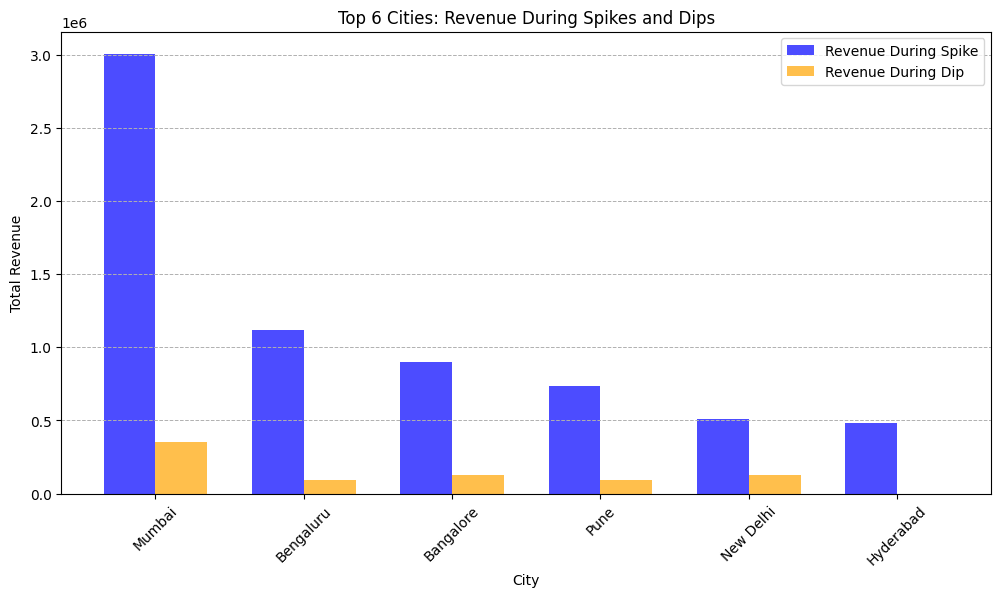

In [241]:
import numpy as np

# Get the top 6 cities during spike weeks
top_6_cities = spike_city_revenue.head(6).index

# Extract revenue for the top 6 cities during spike and dip weeks
spike_revenues = spike_weeks_data[spike_weeks_data['Shipping City'].isin(top_6_cities)].groupby('Shipping City')['Total'].sum()
dip_revenues = dip_weeks_data[dip_weeks_data['Shipping City'].isin(top_6_cities)].groupby('Shipping City')['Total'].sum()

# Ensure all cities are included even if revenue is 0 during dips
spike_revenues = spike_revenues.reindex(top_6_cities, fill_value=0)
dip_revenues = dip_revenues.reindex(top_6_cities, fill_value=0)

# Identify the exact date of the maximum dip for each city
max_dip_dates = {}
for city in top_6_cities:
    city_dip_data = dip_weeks_data[dip_weeks_data['Shipping City'] == city]
    if not city_dip_data.empty:
        # Find the date with the minimum revenue
        min_date = city_dip_data.groupby(city_dip_data.index)['Total'].sum().idxmin()
        max_dip_dates[city] = min_date.date()  # Extract just the date
    else:
        max_dip_dates[city] = "No data"

# Print the values in a table format
print("Top 6 Cities: Revenue During Spikes, Dips, and Max Dip Date")
print("-" * 60)
print(f"{'City':<15}{'Spike Revenue':<15}{'Dip Revenue':<15}{'Max Dip Date':<15}")
print("-" * 60)
for city in top_6_cities:
    print(f"{city:<15}{spike_revenues[city]:<15,.2f}{dip_revenues[city]:<15,.2f}{max_dip_dates[city]:<15}")
print("-" * 60)

# Create a grouped bar chart for comparison
x = np.arange(len(top_6_cities))  # X positions for the cities
width = 0.35  # Width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, spike_revenues, width, label='Revenue During Spike', color='blue', alpha=0.7)
plt.bar(x + width/2, dip_revenues, width, label='Revenue During Dip', color='orange', alpha=0.7)

# Add labels and title
plt.title('Top 6 Cities: Revenue During Spikes and Dips')
plt.ylabel('Total Revenue')
plt.xlabel('City')
plt.xticks(x, top_6_cities, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


# part 2

In [206]:
# Extract Size (captures XS, S, M, L, XL, XXL)
data['Size'] = data['Product'].str.extract(r'-\s*([XSML]{1,2}X?L?)')

color_1 = data['Product'].str.extract(r'-\s*([A-Za-z]+(?:-[a-z]+)?)\s*-\s*[XSML]{1,2}X?L?')
color_2 = data['Product'].str.extract(r'-\s*[A-Za-z]+\s*-\s*([a-z]+)')
data['Color'] = color_1[0].combine_first(color_2[0])


data['Pre_Order'] = data['Product'].str.contains(r'\[.*PRE-ORDER.*\]', case=False)

# Display the cleaned data
print(data[['Product', 'Size', 'Color', 'Pre_Order']])

                                                        Product Size  Color  \
Created Date                                                                  
2020-12-05                        The Ultimate Leggings - L-una    L    una   
2020-12-05                      The Ultimate Leggings - S-elene    S  elene   
2020-12-05                        The Ultimate Leggings - L-una    L    una   
2020-12-05                        The Ultimate Leggings - M-aia    M    aia   
2020-12-05                      The Ultimate Leggings - S-elene    S  elene   
...                                                         ...  ...    ...   
2021-06-29    The Ultimate Leggings - Bullbull Burgundy - M-...    M    aia   
2021-06-29    The Ultimate Leggings - Bullbull Burgundy - L-...    L    una   
2021-06-29    The Ultimate Leggings - Naina Navy - XL-una [P...   XL    una   
2021-06-29         The Ultimate Leggings - Bliss Black - XL-una   XL    una   
2021-06-29          The Ultimate Leggings - Bliss Bl

In [207]:
data.head()

ID  Subtotal   Total  Discount Amount  Lineitem quantity  \
Created Date                                                             
2020-12-05     1    1999.0  1999.0              0.0                  1   
2020-12-05     2    1999.0  1999.0              0.0                  1   
2020-12-05     3    1999.0  1999.0              0.0                  1   
2020-12-05     4    1999.0  1999.0              0.0                  1   
2020-12-05     5    1999.0  1999.0              0.0                  1   

                                      Product Billing City Billing Zip  \
Created Date                                                             
2020-12-05      The Ultimate Leggings - L-una    Bengaluru     '560064   
2020-12-05    The Ultimate Leggings - S-elene      Gurgaon     '122001   
2020-12-05      The Ultimate Leggings - L-una    Bangalore     '560072   
2020-12-05      The Ultimate Leggings - M-aia   Bengaluru      '560102   
2020-12-05    The Ultimate Leggings - S-elene    BENGALURU     '560102   

             Billing Province Shipping City Shipping Zip Shipping Province  \
Created Date                                                                 
2020-12-05                 KA     Bengaluru      '560064                KA   
2020-12-05                 HR       Gurgaon      '122001                HR   
2020-12-05                 KA     Bangalore      '560072                KA   
2020-12-05                 KA    Bengaluru       '560102                KA   
2020-12-05                 KA     BENGALURU      '560102                KA   

             Billing Province Name Shipping Province Name Size  Color  \
Created Date                                                            
2020-12-05               Karnataka              Karnataka    L    una   
2020-12-05                 Haryana                Haryana    S  elene   
2020-12-05               Karnataka              Karnataka    L    una   
2020-12-05               Karnataka              Karnataka    M    aia   
2020-12-05               Karnataka              Karnataka    S  elene   

              Pre_Order  
Created Date             
2020-12-05        False  
2020-12-05        False  
2020-12-05        False  
2020-12-05        False  
2020-12-05        False

<Figure size 1400x800 with 0 Axes>

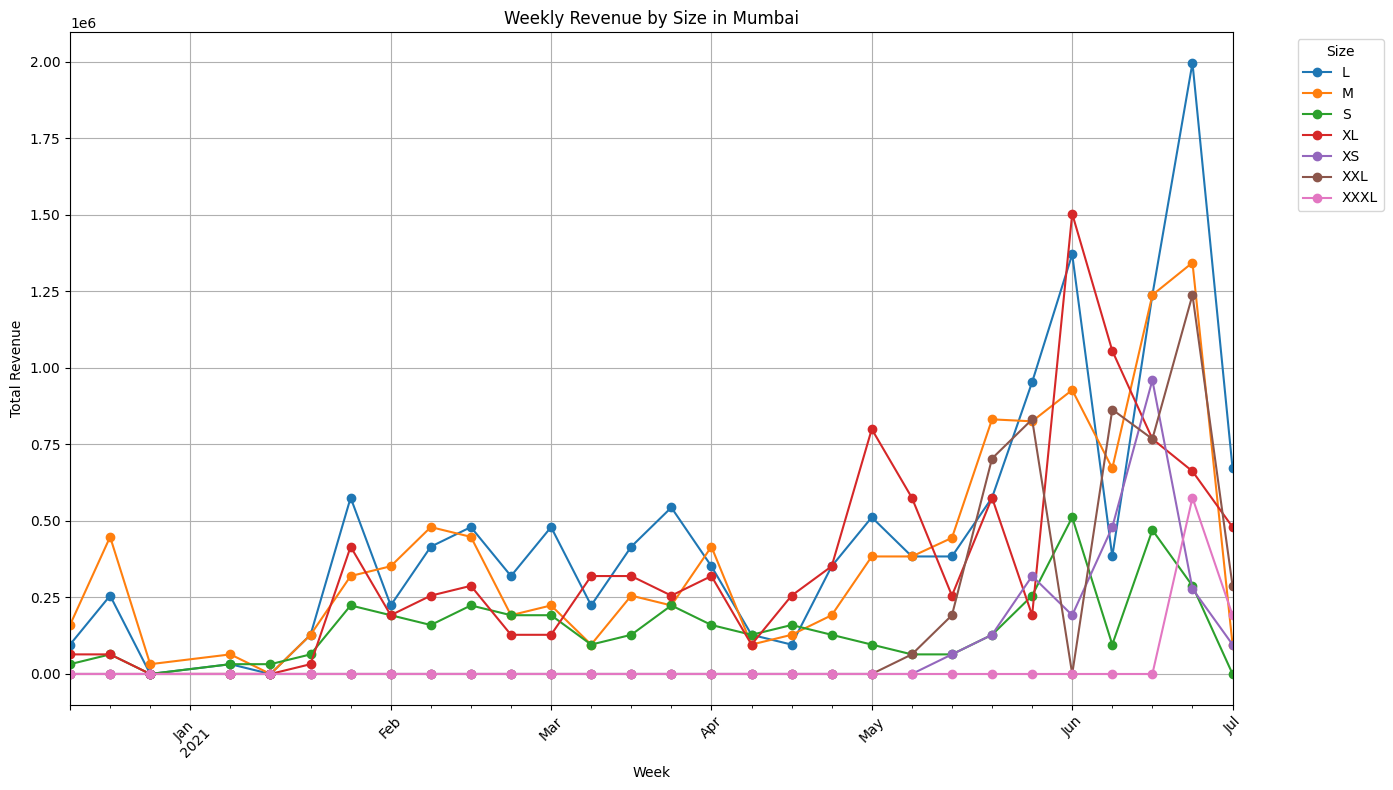

<Figure size 1400x800 with 0 Axes>

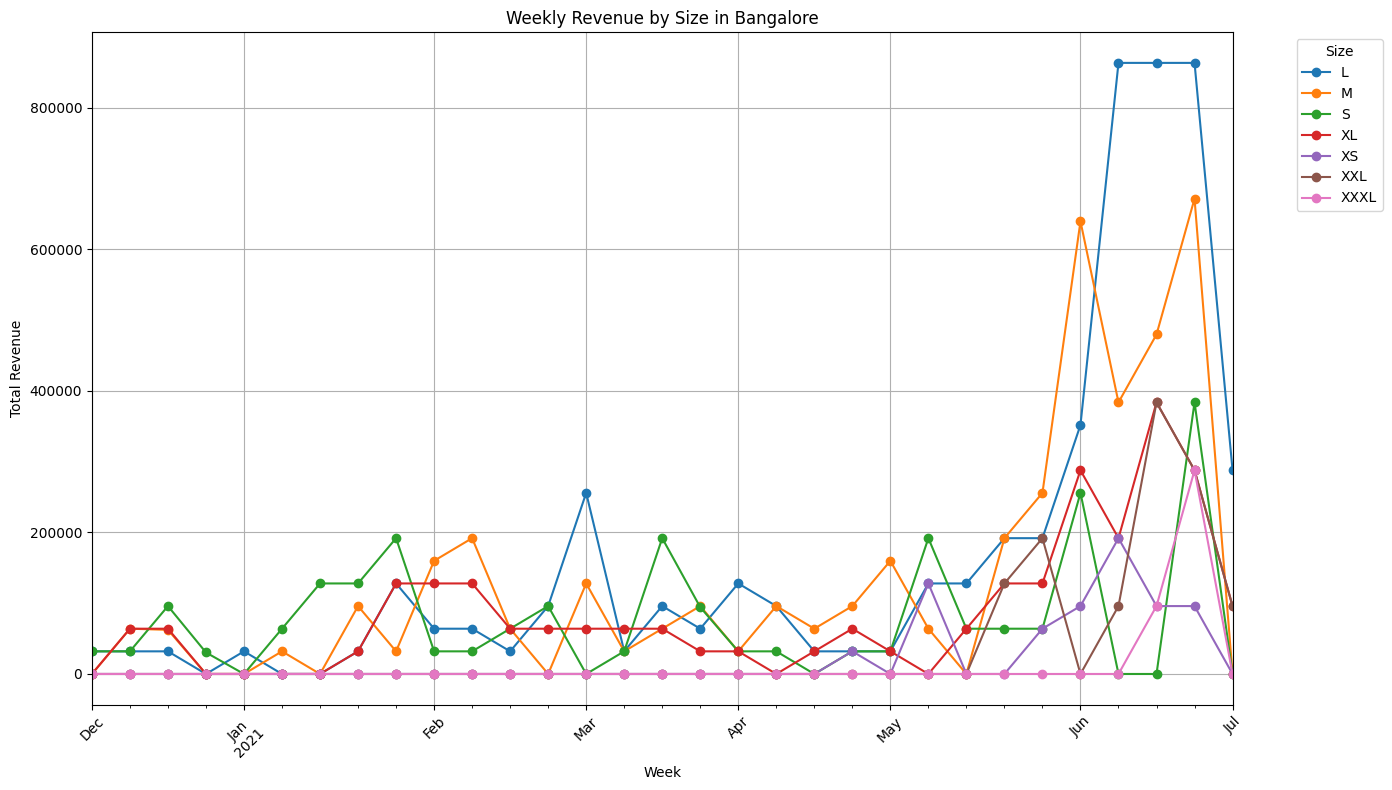

<Figure size 1400x800 with 0 Axes>

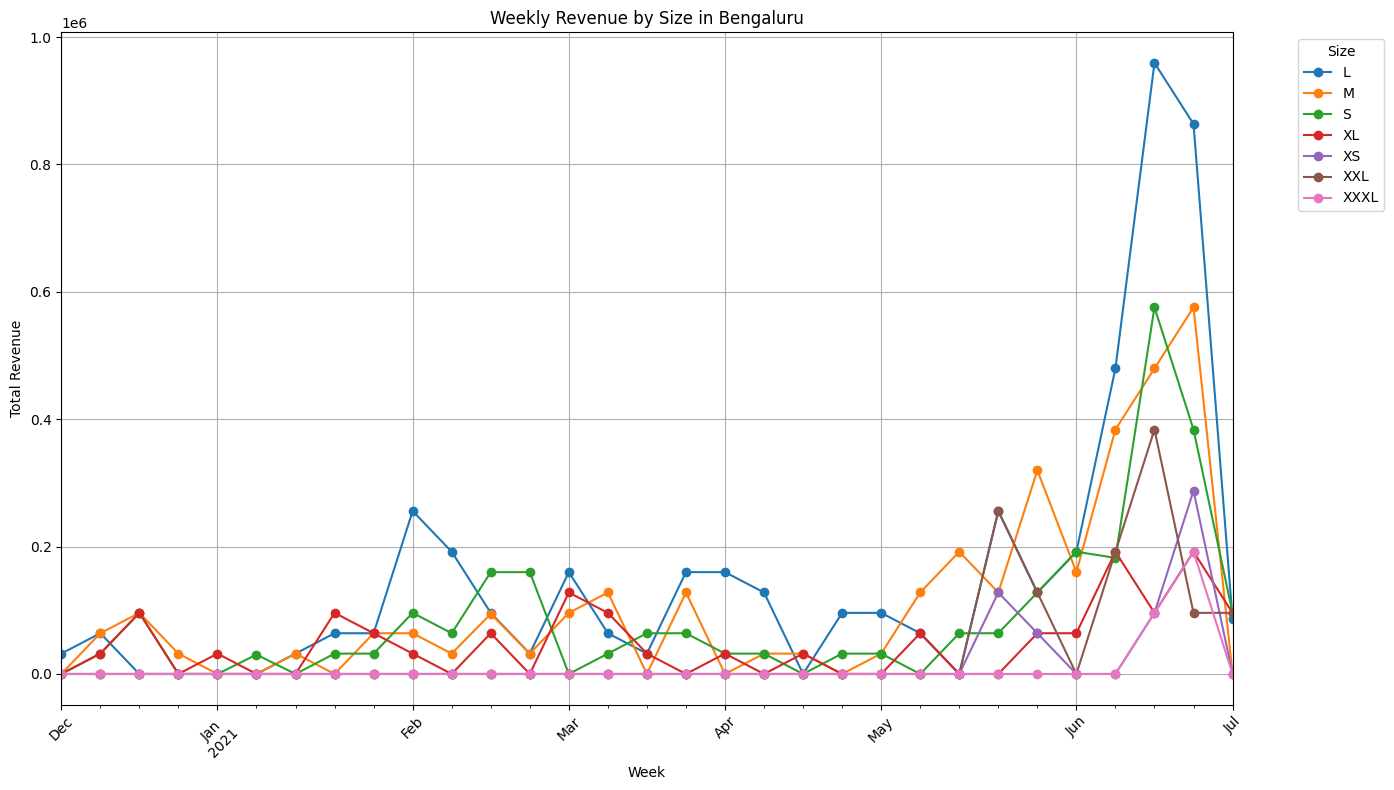

<Figure size 1400x800 with 0 Axes>

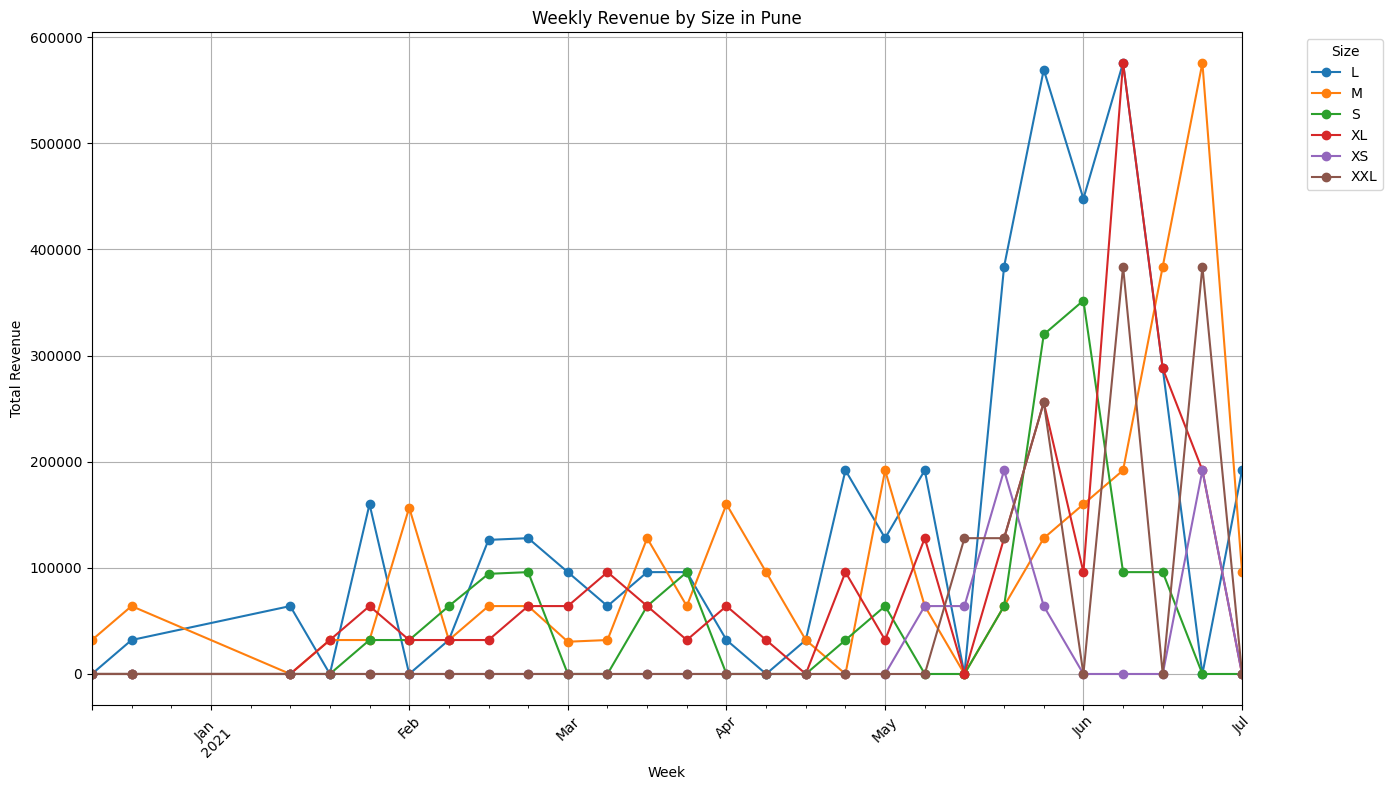

<Figure size 1400x800 with 0 Axes>

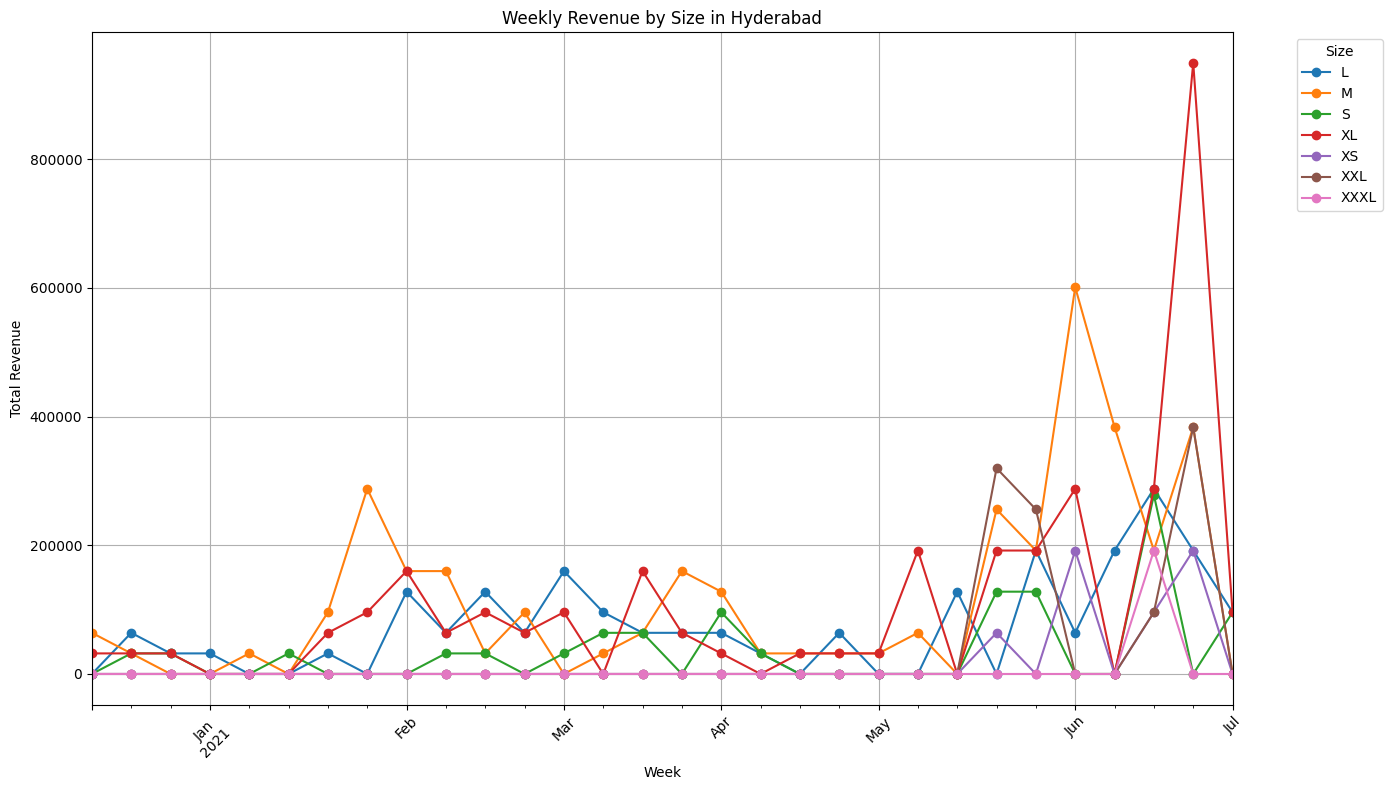

<Figure size 1400x800 with 0 Axes>

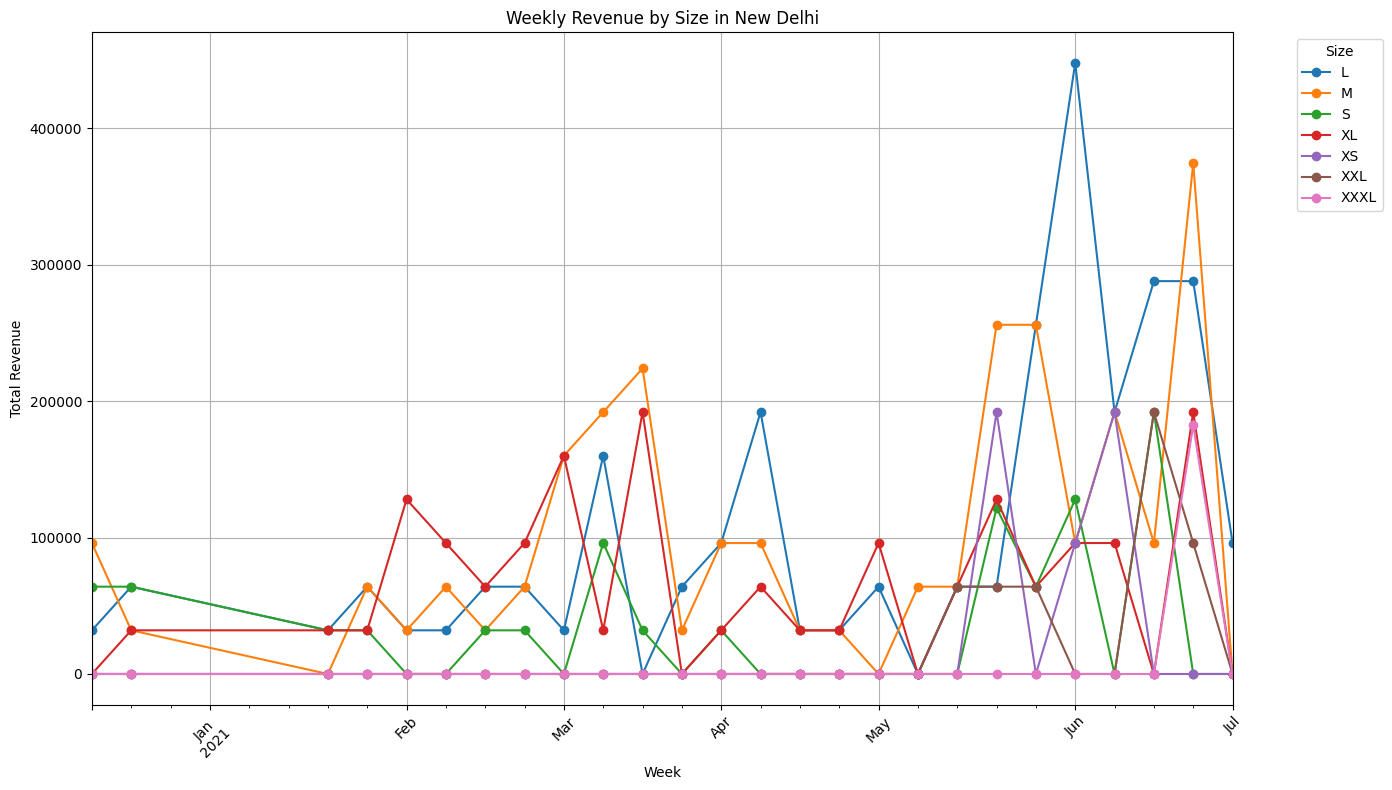

<Figure size 1400x800 with 0 Axes>

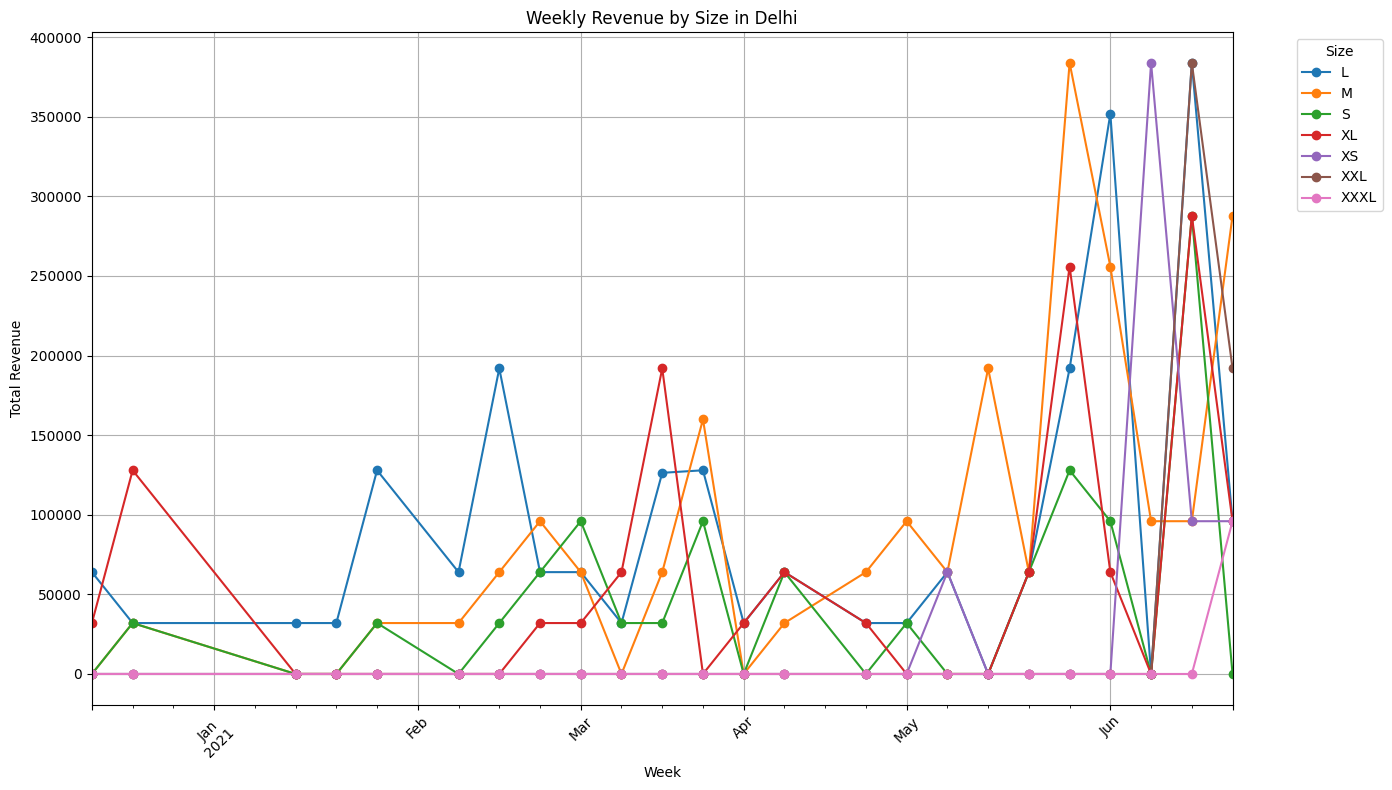

<Figure size 1400x800 with 0 Axes>

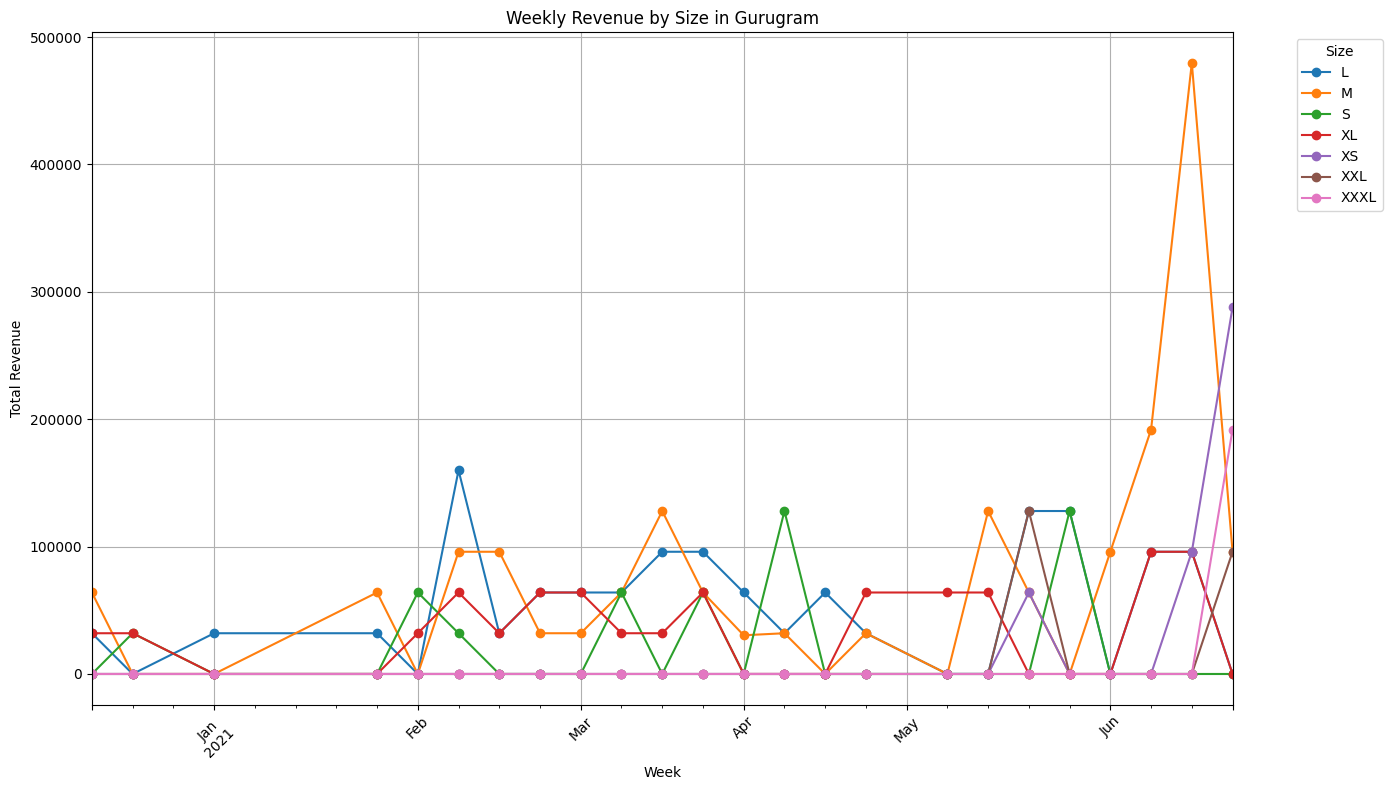

<Figure size 1400x800 with 0 Axes>

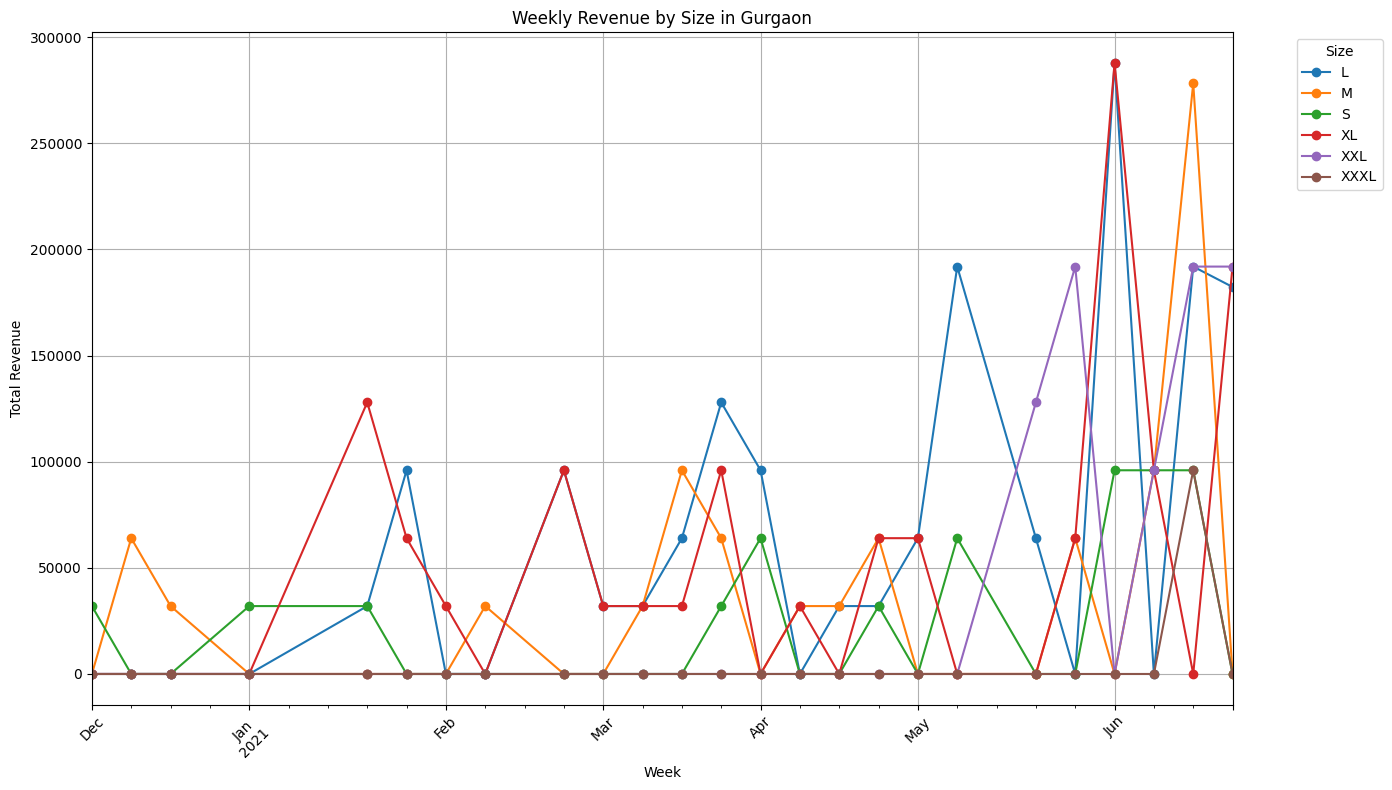

<Figure size 1400x800 with 0 Axes>

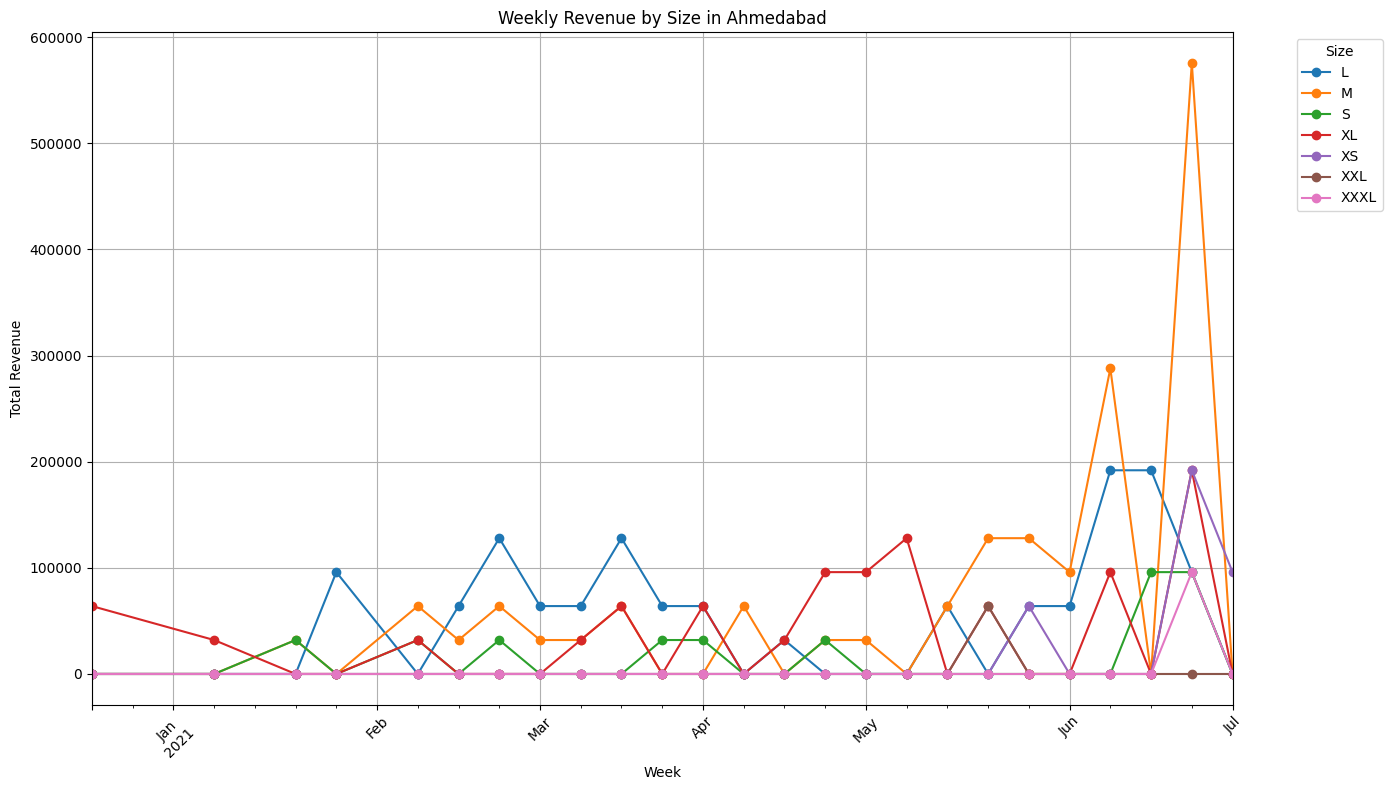

<Figure size 1400x800 with 0 Axes>

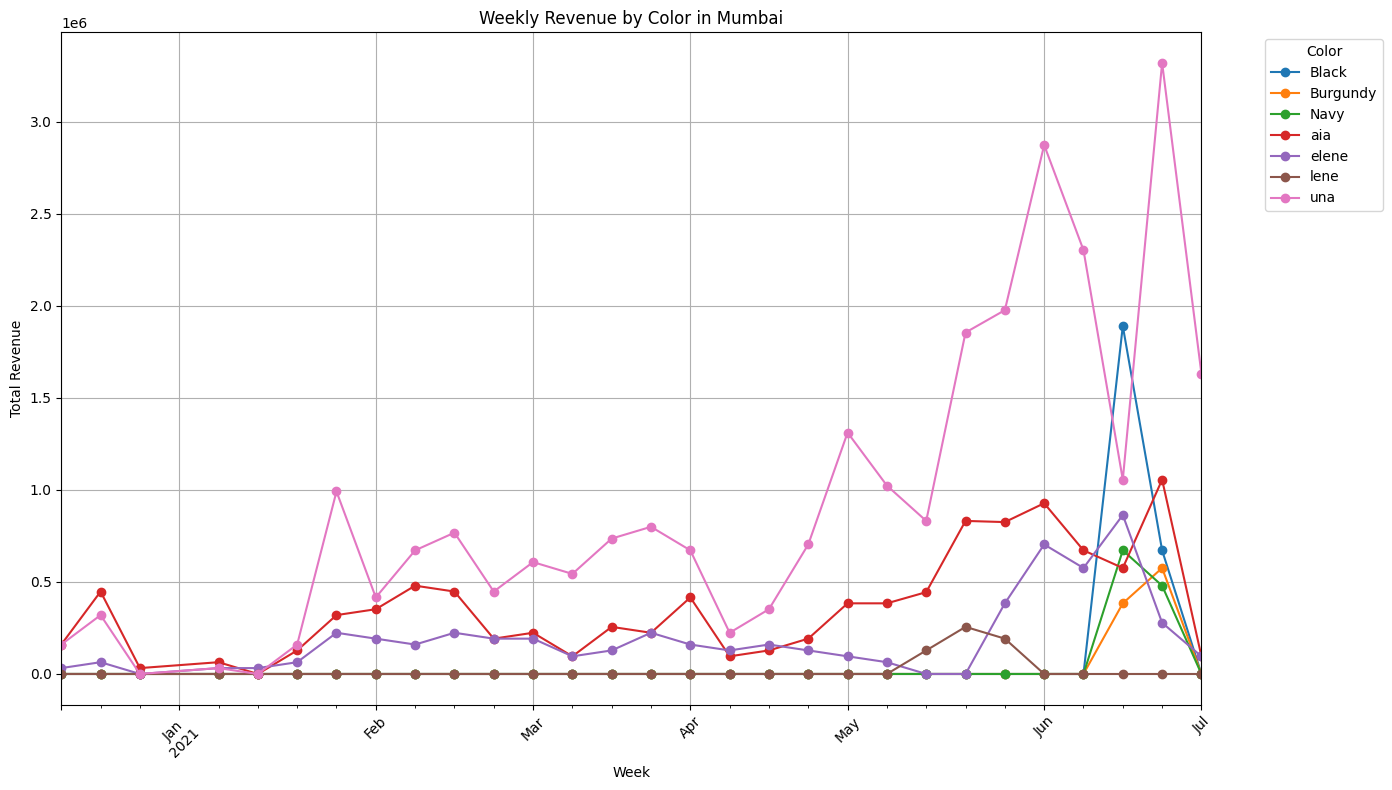

<Figure size 1400x800 with 0 Axes>

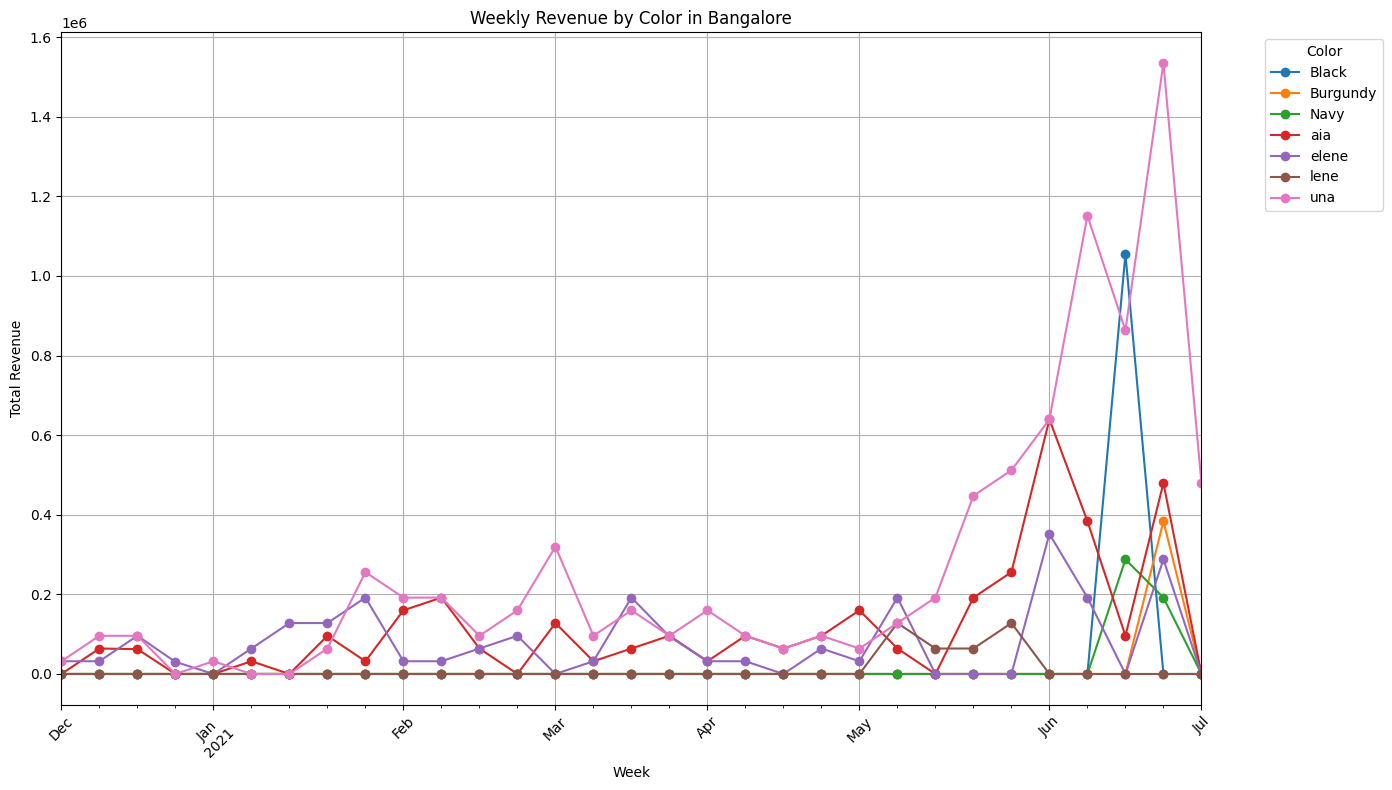

<Figure size 1400x800 with 0 Axes>

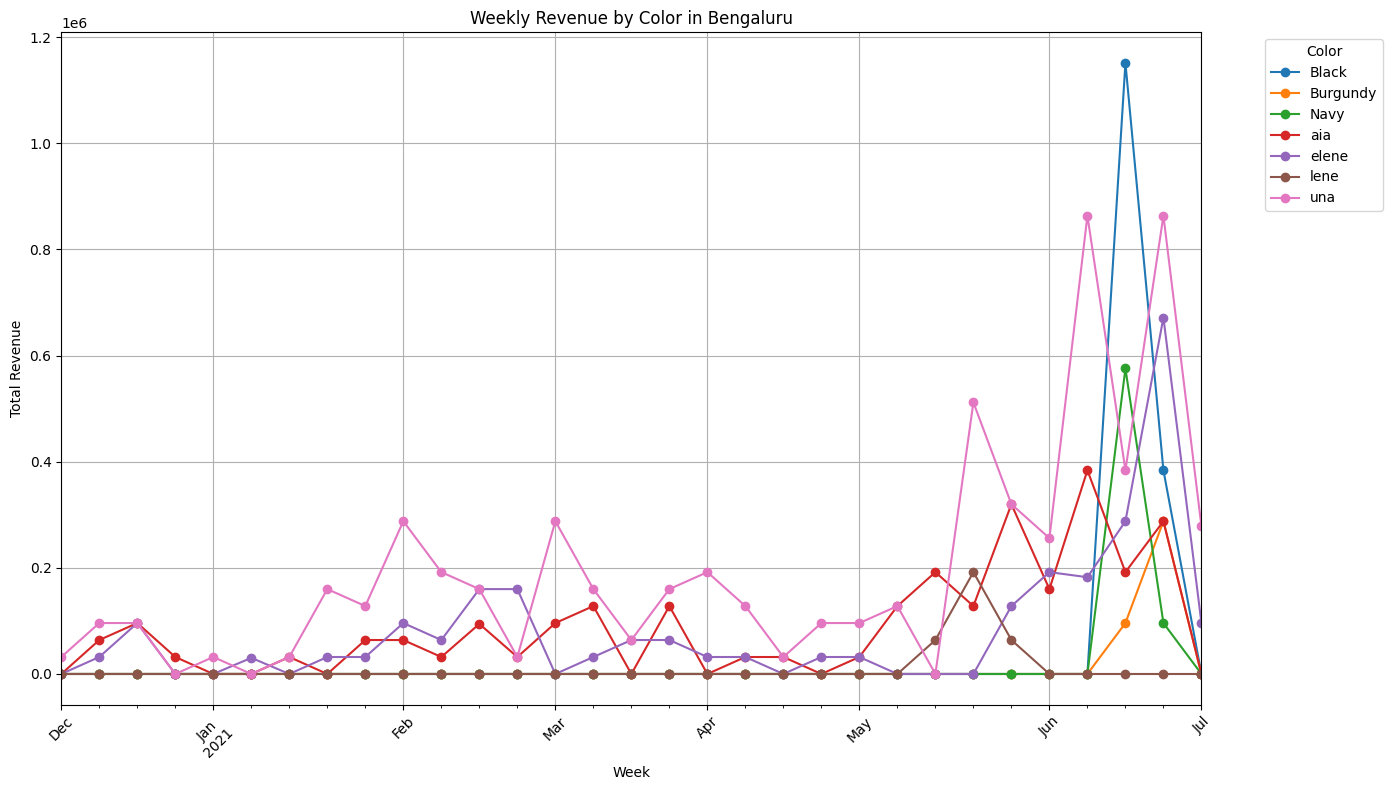

<Figure size 1400x800 with 0 Axes>

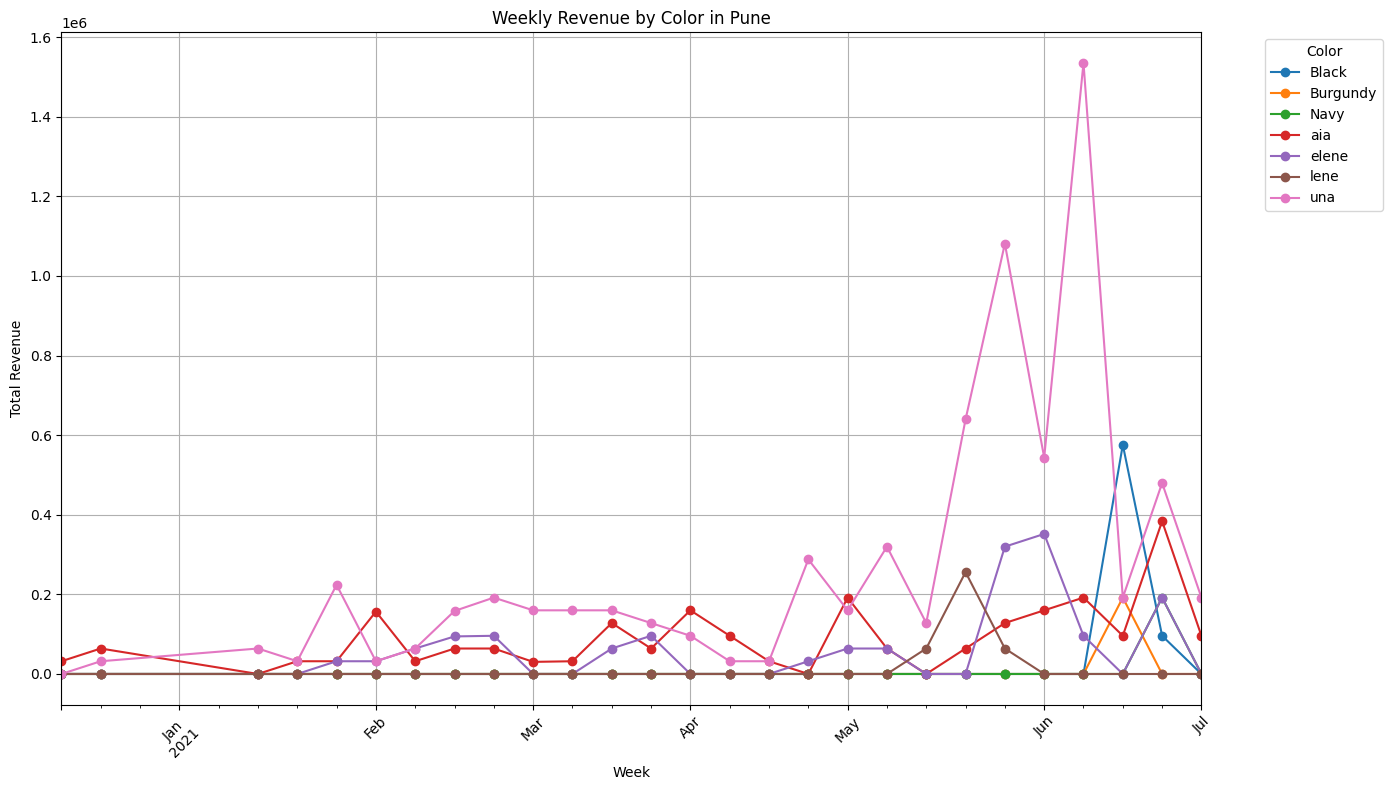

<Figure size 1400x800 with 0 Axes>

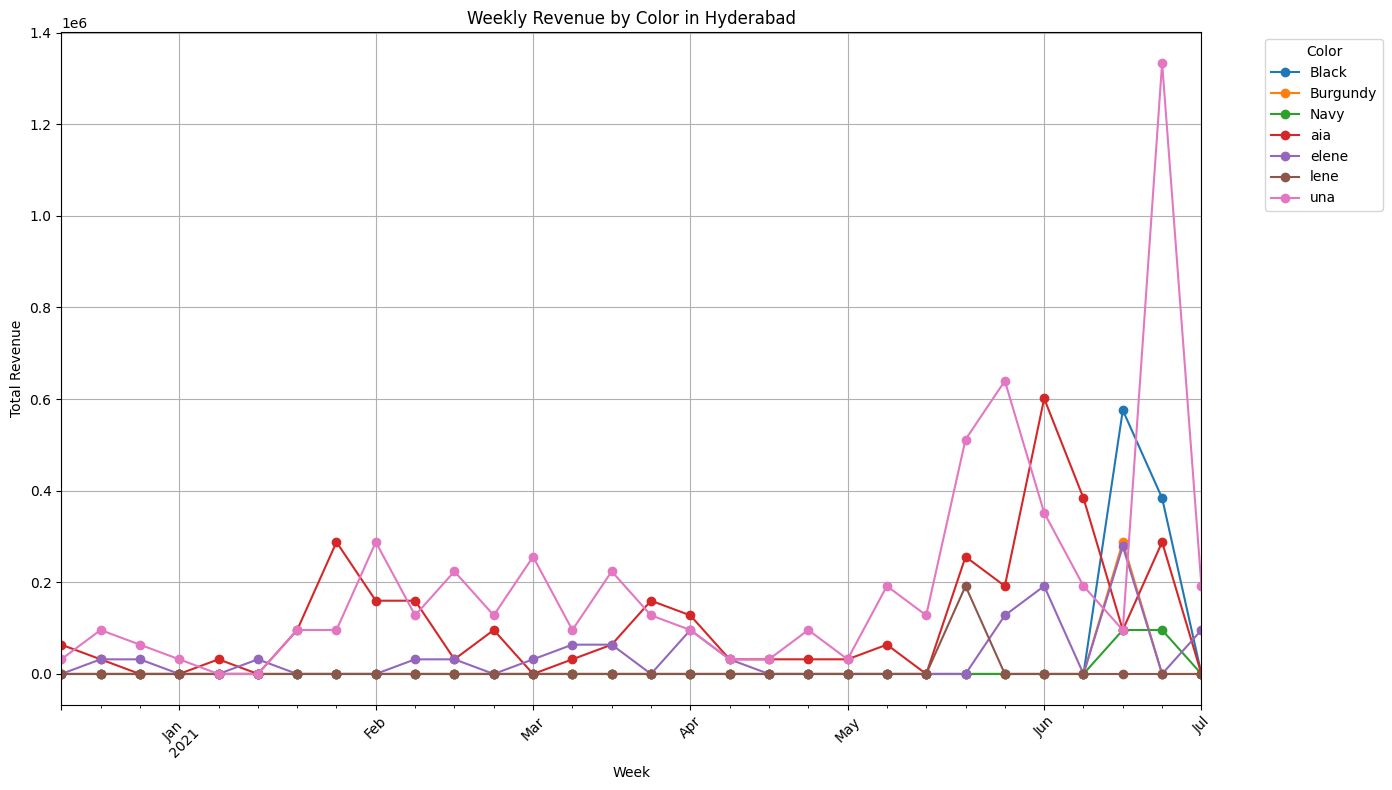

<Figure size 1400x800 with 0 Axes>

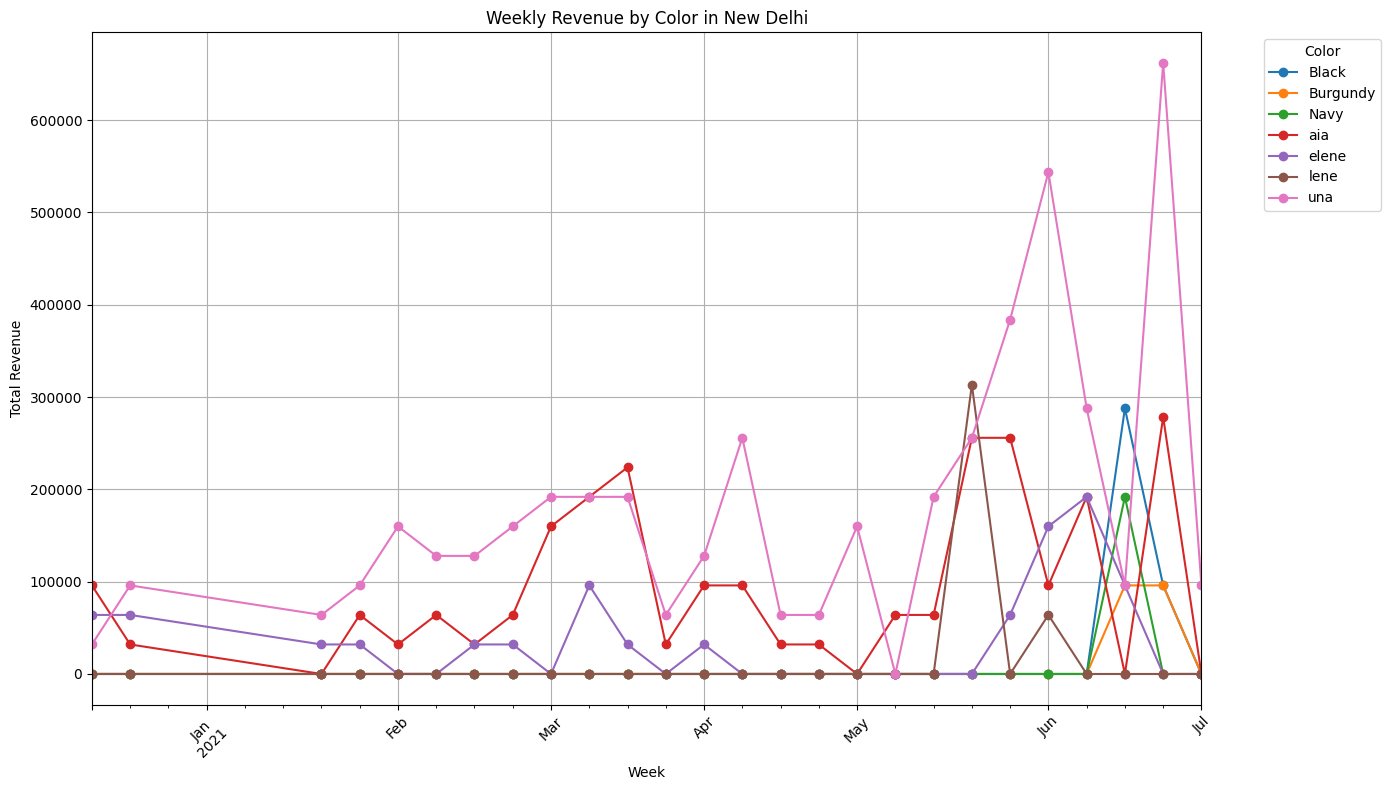

<Figure size 1400x800 with 0 Axes>

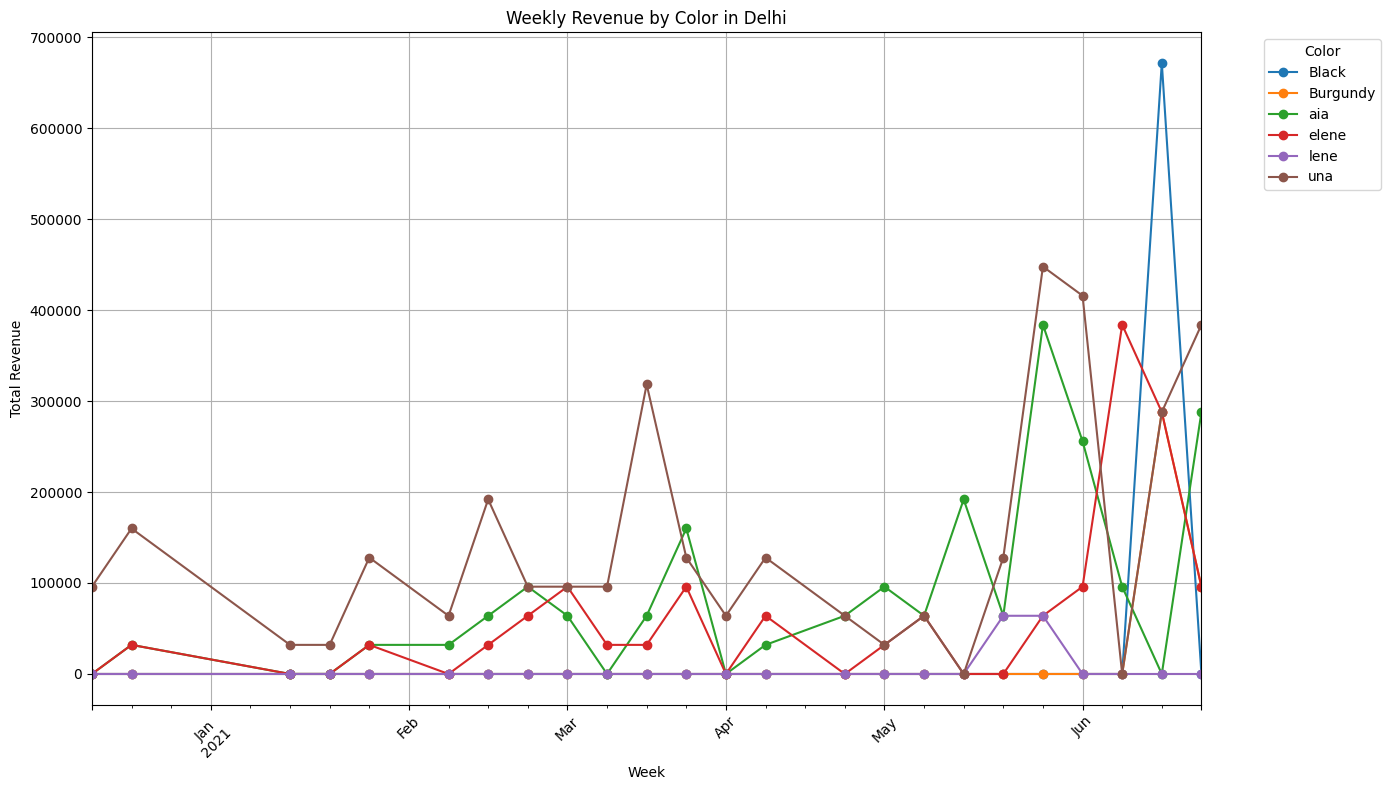

<Figure size 1400x800 with 0 Axes>

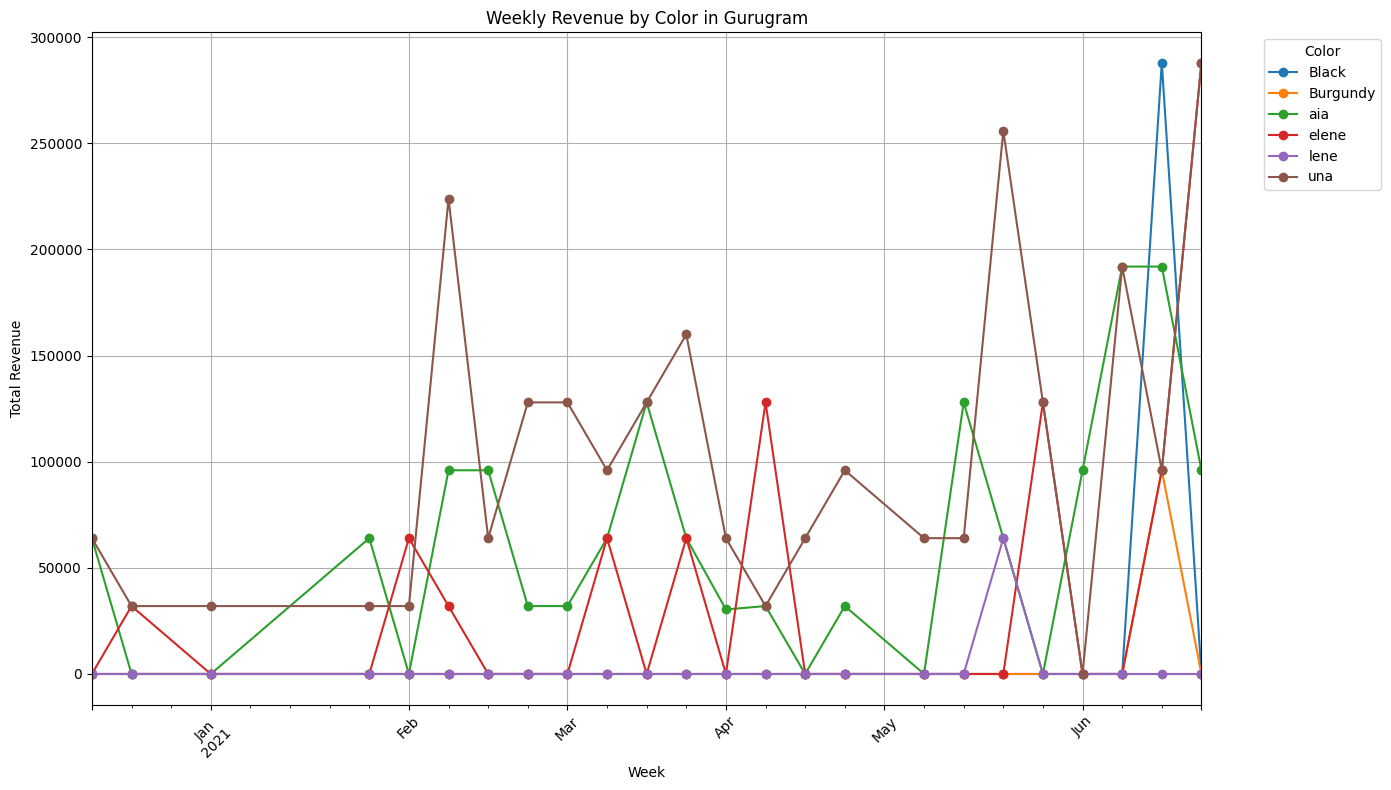

<Figure size 1400x800 with 0 Axes>

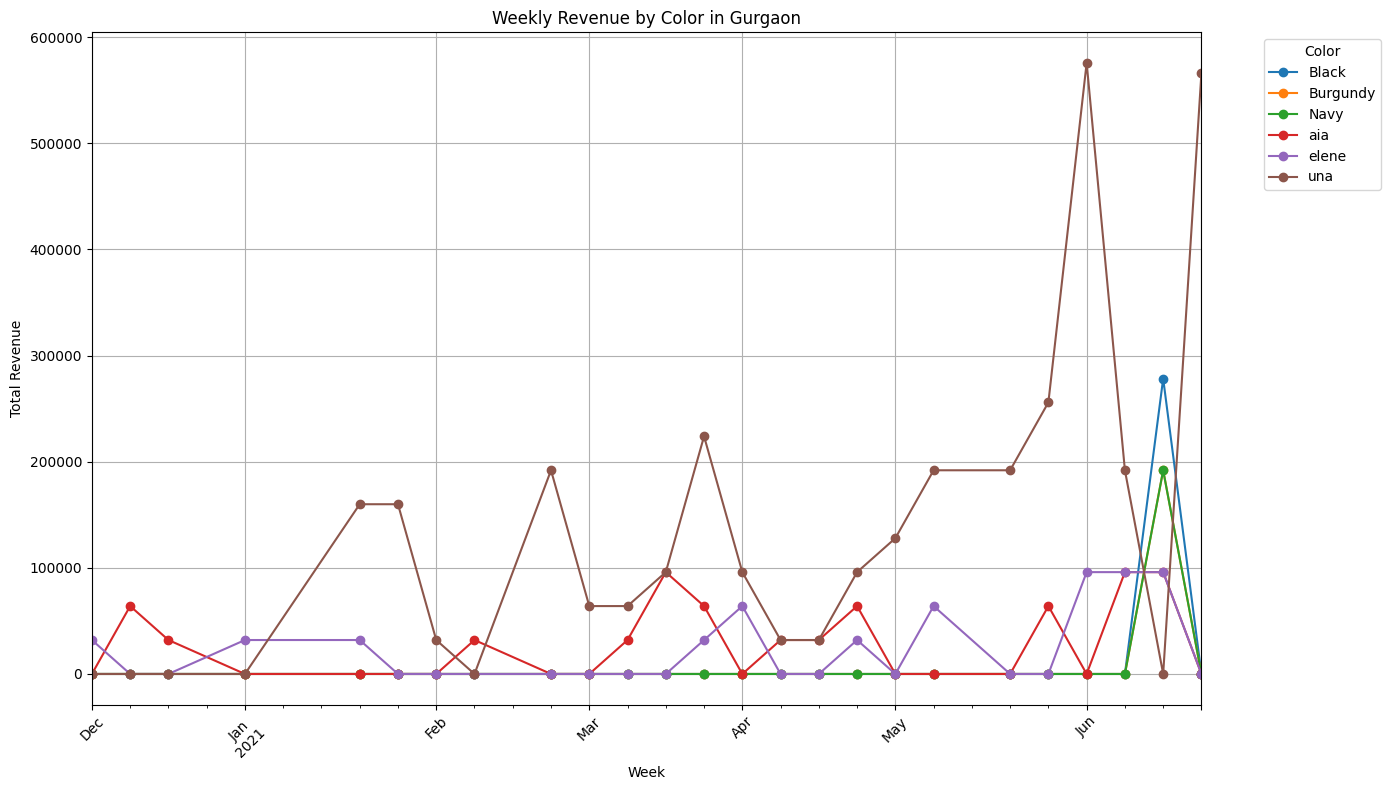

<Figure size 1400x800 with 0 Axes>

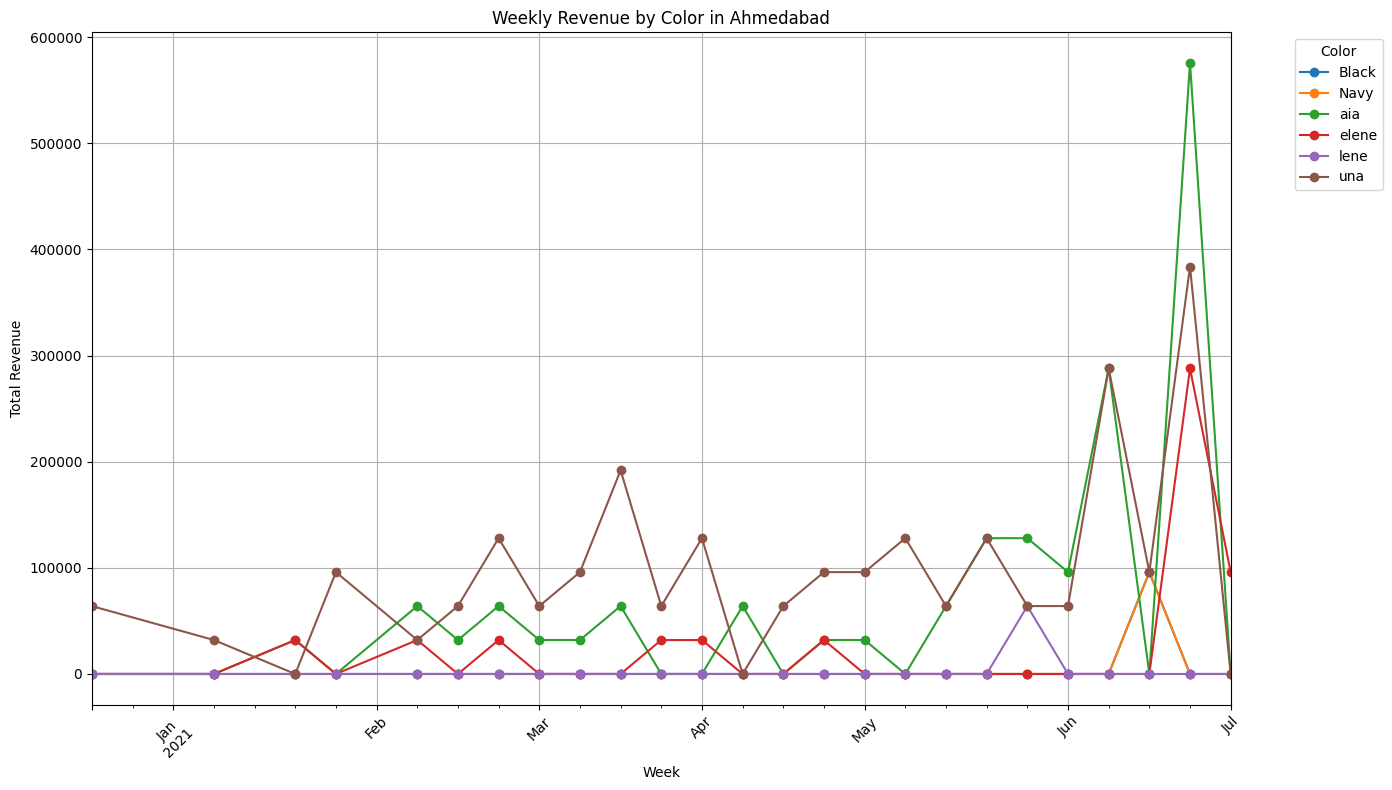

In [213]:
# Create a 'Week' column for weekly aggregation
data['Week'] = data.index.to_period('W')

# Group by week, size, color, and city to get weekly performance
weekly_performance = data.groupby(['Week', 'Size', 'Color', 'Shipping City'])['Subtotal'].agg('sum').reset_index()

# Find top-selling cities based on total revenue (sum of 'Subtotal')
top_cities = weekly_performance.groupby('Shipping City')['Subtotal'].sum().sort_values(ascending=False).head(10).index

# Filter the data to include only top-selling cities
top_city_data = weekly_performance[weekly_performance['Shipping City'].isin(top_cities)]

# Plot revenue by size for each top-selling city
for city in top_cities:
    city_data = top_city_data[top_city_data['Shipping City'] == city]
    
    # Pivot the table to have Size as columns and Week as rows
    pivot_size = city_data.pivot_table(index='Week', columns='Size', values='Subtotal', aggfunc='sum', fill_value=0)
    
    # Plotting for Size
    plt.figure(figsize=(14, 8))
    pivot_size.plot(marker='o', linestyle='-', figsize=(14, 8))
    
    # Customize the plot for better readability
    plt.title(f'Weekly Revenue by Size in {city}')
    plt.xlabel('Week')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.legend(title='Size', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Plot revenue by color for each top-selling city
for city in top_cities:
    city_data = top_city_data[top_city_data['Shipping City'] == city]
    
    # Pivot the table to have Color as columns and Week as rows
    pivot_color = city_data.pivot_table(index='Week', columns='Color', values='Subtotal', aggfunc='sum', fill_value=0)
    
    # Plotting for Color
    plt.figure(figsize=(14, 8))
    pivot_color.plot(marker='o', linestyle='-', figsize=(14, 8))
    
    # Customize the plot for better readability
    plt.title(f'Weekly Revenue by Color in {city}')
    plt.xlabel('Week')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

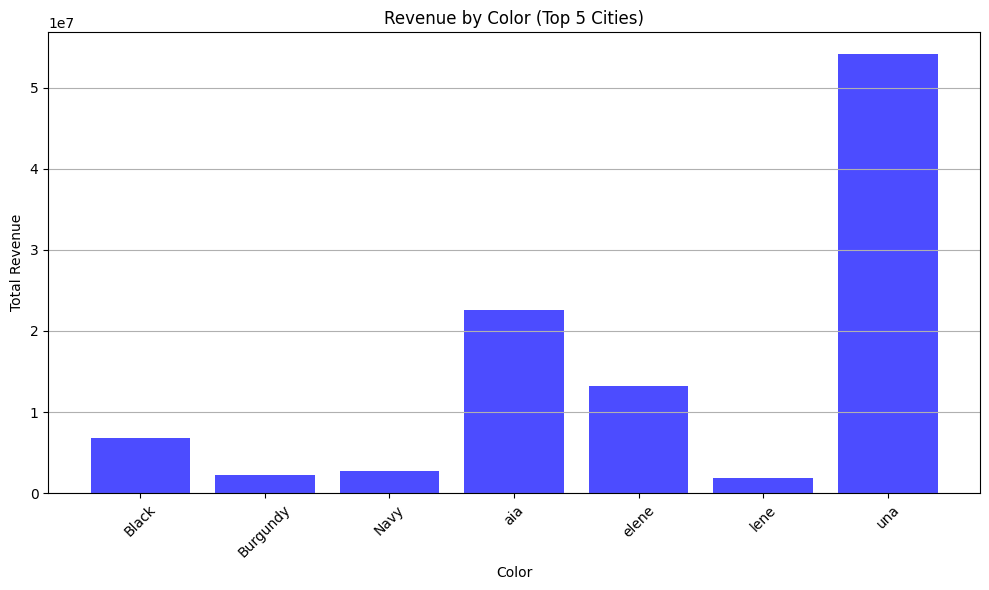

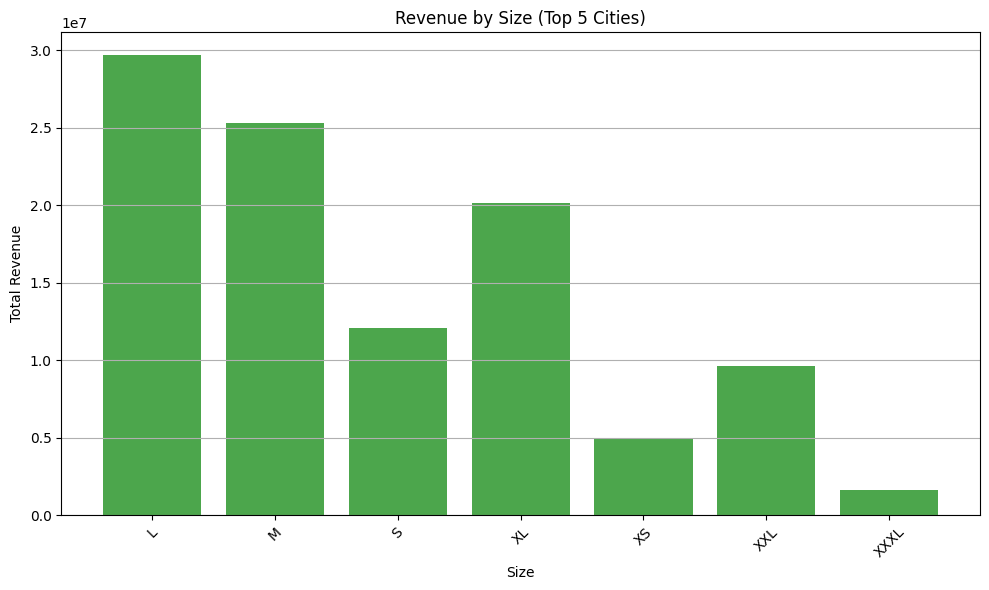

"\n# Plot revenue by color for bottom 5 cities\nplt.figure(figsize=(10, 6))\nplt.bar(color_revenue_bottom['Color'], color_revenue_bottom['Subtotal'], color='red', alpha=0.7)\nplt.title('Revenue by Color (Bottom 5 Cities)')\nplt.xlabel('Color')\nplt.ylabel('Total Revenue')\nplt.xticks(rotation=45)\nplt.grid(axis='y')\nplt.tight_layout()\nplt.show()\n\n# Plot revenue by size for bottom 5 cities\nplt.figure(figsize=(10, 6))\nplt.bar(size_revenue_bottom['Size'], size_revenue_bottom['Subtotal'], color='purple', alpha=0.7)\nplt.title('Revenue by Size (Bottom 5 Cities)')\nplt.xlabel('Size')\nplt.ylabel('Total Revenue')\nplt.xticks(rotation=45)\nplt.grid(axis='y')\nplt.tight_layout()\nplt.show()"

In [219]:
# Create a 'Week' column for weekly aggregation
data['Week'] = data.index.to_period('W')

# Group by week, size, color, and city to get total revenue
weekly_performance = data.groupby(['Week', 'Size', 'Color', 'Shipping City'])['Subtotal'].agg('sum').reset_index()

# Find top 5 and bottom 5 cities based on total revenue
city_revenue = weekly_performance.groupby('Shipping City')['Subtotal'].sum().sort_values(ascending=False)

top_5_cities = city_revenue.head(5).index
bottom_5_cities = city_revenue.tail(5).index

# Filter data for top 5 and bottom 5 cities
top_cities_data = weekly_performance[weekly_performance['Shipping City'].isin(top_5_cities)]
bottom_cities_data = weekly_performance[weekly_performance['Shipping City'].isin(bottom_5_cities)]

# Aggregate revenue by color for top 5 cities
color_revenue_top = top_cities_data.groupby('Color')['Subtotal'].sum().reset_index()

# Aggregate revenue by size for top 5 cities
size_revenue_top = top_cities_data.groupby('Size')['Subtotal'].sum().reset_index()

# Aggregate revenue by color for bottom 5 cities
color_revenue_bottom = bottom_cities_data.groupby('Color')['Subtotal'].sum().reset_index()

# Aggregate revenue by size for bottom 5 cities
size_revenue_bottom = bottom_cities_data.groupby('Size')['Subtotal'].sum().reset_index()

# Plot revenue by color for top 5 cities
plt.figure(figsize=(10, 6))
plt.bar(color_revenue_top['Color'], color_revenue_top['Subtotal'], color='blue', alpha=0.7)
plt.title('Revenue by Color (Top 5 Cities)')
plt.xlabel('Color')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot revenue by size for top 5 cities
plt.figure(figsize=(10, 6))
plt.bar(size_revenue_top['Size'], size_revenue_top['Subtotal'], color='green', alpha=0.7)
plt.title('Revenue by Size (Top 5 Cities)')
plt.xlabel('Size')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
'''
# Plot revenue by color for bottom 5 cities
plt.figure(figsize=(10, 6))
plt.bar(color_revenue_bottom['Color'], color_revenue_bottom['Subtotal'], color='red', alpha=0.7)
plt.title('Revenue by Color (Bottom 5 Cities)')
plt.xlabel('Color')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot revenue by size for bottom 5 cities
plt.figure(figsize=(10, 6))
plt.bar(size_revenue_bottom['Size'], size_revenue_bottom['Subtotal'], color='purple', alpha=0.7)
plt.title('Revenue by Size (Bottom 5 Cities)')
plt.xlabel('Size')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()'''

In [218]:
'''# Group data by city, size, and color to calculate the total quantity ordered
city_size_data = data.groupby(['Shipping City', 'Size'])['Lineitem quantity'].sum().reset_index()
city_color_data = data.groupby(['Shipping City', 'Color'])['Lineitem quantity'].sum().reset_index()

# List of unique cities
cities = data['Shipping City'].unique()

# Create bar graphs for each city, showing quantity by size and color

for city in cities:
    # Filter data for the current city
    size_data_city = city_size_data[city_size_data['Shipping City'] == city]
    color_data_city = city_color_data[city_color_data['Shipping City'] == city]
    
    # Plot quantity by size for the current city
    plt.figure(figsize=(10, 6))
    plt.bar(size_data_city['Size'], size_data_city['Lineitem quantity'], color='lightblue', alpha=0.7)
    plt.title(f'Sizes Ordered in {city}')
    plt.xlabel('Size')
    plt.ylabel('Total Quantity Ordered')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    
    # Plot quantity by color for the current city
    plt.figure(figsize=(10, 6))
    plt.bar(color_data_city['Color'], color_data_city['Lineitem quantity'], color='orange', alpha=0.7)
    plt.title(f'Colors Ordered in {city}')
    plt.xlabel('Color')
    plt.ylabel('Total Quantity Ordered')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()'''

"# Group data by city, size, and color to calculate the total quantity ordered\ncity_size_data = data.groupby(['Shipping City', 'Size'])['Lineitem quantity'].sum().reset_index()\ncity_color_data = data.groupby(['Shipping City', 'Color'])['Lineitem quantity'].sum().reset_index()\n\n# List of unique cities\ncities = data['Shipping City'].unique()\n\n# Create bar graphs for each city, showing quantity by size and color\n\nfor city in cities:\n    # Filter data for the current city\n    size_data_city = city_size_data[city_size_data['Shipping City'] == city]\n    color_data_city = city_color_data[city_color_data['Shipping City'] == city]\n    \n    # Plot quantity by size for the current city\n    plt.figure(figsize=(10, 6))\n    plt.bar(size_data_city['Size'], size_data_city['Lineitem quantity'], color='lightblue', alpha=0.7)\n    plt.title(f'Sizes Ordered in {city}')\n    plt.xlabel('Size')\n    plt.ylabel('Total Quantity Ordered')\n    plt.xticks(rotation=45)\n    plt.grid(axis='y')\n  

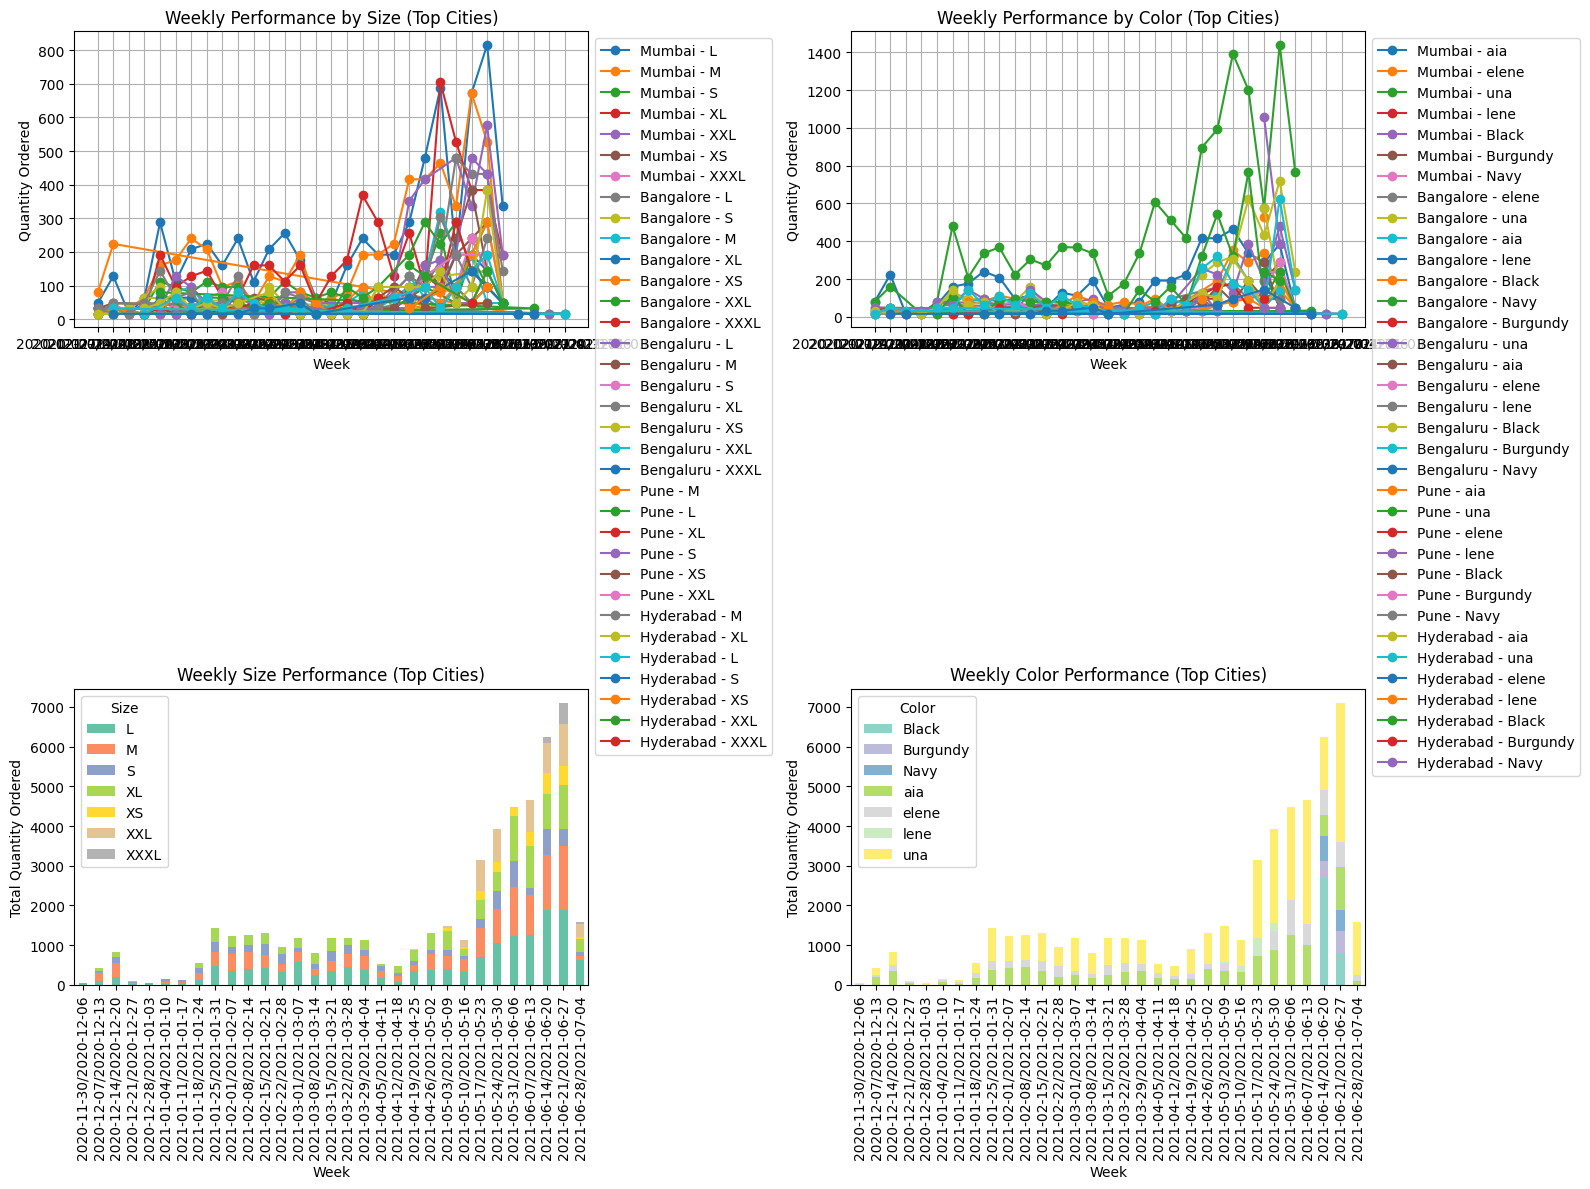

In [235]:
# Now we can proceed with the grouping and analysis
data['Week'] = data.index.to_period('W')  # Add a week column for weekly analysis

# Group data by week, size, color, and city
weekly_performance_size = data.groupby(['Week', 'Shipping City', 'Size'])['Lineitem quantity'].sum().reset_index()
weekly_performance_color = data.groupby(['Week', 'Shipping City', 'Color'])['Lineitem quantity'].sum().reset_index()

# Identify top-performing cities based on total revenue/quantity
top_cities = data.groupby('Shipping City')['Lineitem quantity'].sum().nlargest(5).index

# Filter data for top-performing cities
top_cities_size = weekly_performance_size[weekly_performance_size['Shipping City'].isin(top_cities)]
top_cities_color = weekly_performance_color[weekly_performance_color['Shipping City'].isin(top_cities)]

# Set up the figure for multiple plots
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Weekly performance by size (line chart)
for city in top_cities:
    city_data = top_cities_size[top_cities_size['Shipping City'] == city]
    for size in city_data['Size'].unique():
        size_data = city_data[city_data['Size'] == size]
        axes[0, 0].plot(size_data['Week'].astype(str), size_data['Lineitem quantity'], label=f'{city} - {size}', marker='o')
axes[0, 0].set_title('Weekly Performance by Size (Top Cities)')
axes[0, 0].set_xlabel('Week')
axes[0, 0].set_ylabel('Quantity Ordered')
axes[0, 0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0, 0].grid(True)

# Plot 2: Weekly performance by color (line chart)
for city in top_cities:
    city_data = top_cities_color[top_cities_color['Shipping City'] == city]
    for color in city_data['Color'].unique():
        color_data = city_data[city_data['Color'] == color]
        axes[0, 1].plot(color_data['Week'].astype(str), color_data['Lineitem quantity'], label=f'{city} - {color}', marker='o')
axes[0, 1].set_title('Weekly Performance by Color (Top Cities)')
axes[0, 1].set_xlabel('Week')
axes[0, 1].set_ylabel('Quantity Ordered')
axes[0, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0, 1].grid(True)

# Plot 3: Stacked bar chart by size (weekly performance)
pivot_size = top_cities_size.pivot_table(index='Week', columns='Size', values='Lineitem quantity', aggfunc='sum')

# Plot stacked bar chart for weekly size performance
pivot_size.plot(kind='bar', stacked=True, ax=axes[1, 0], cmap='Set2')
axes[1, 0].set_title('Weekly Size Performance (Top Cities)')
axes[1, 0].set_xlabel('Week')
axes[1, 0].set_ylabel('Total Quantity Ordered')
axes[1, 0].legend(title='Size')

# Plot 4: Stacked bar chart by color (weekly performance)
pivot_color = top_cities_color.pivot_table(index='Week', columns='Color', values='Lineitem quantity', aggfunc='sum')

# Plot stacked bar chart for weekly color performance
pivot_color.plot(kind='bar', stacked=True, ax=axes[1, 1], cmap='Set3')
axes[1, 1].set_title('Weekly Color Performance (Top Cities)')
axes[1, 1].set_xlabel('Week')
axes[1, 1].set_ylabel('Total Quantity Ordered')
axes[1, 1].legend(title='Color')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


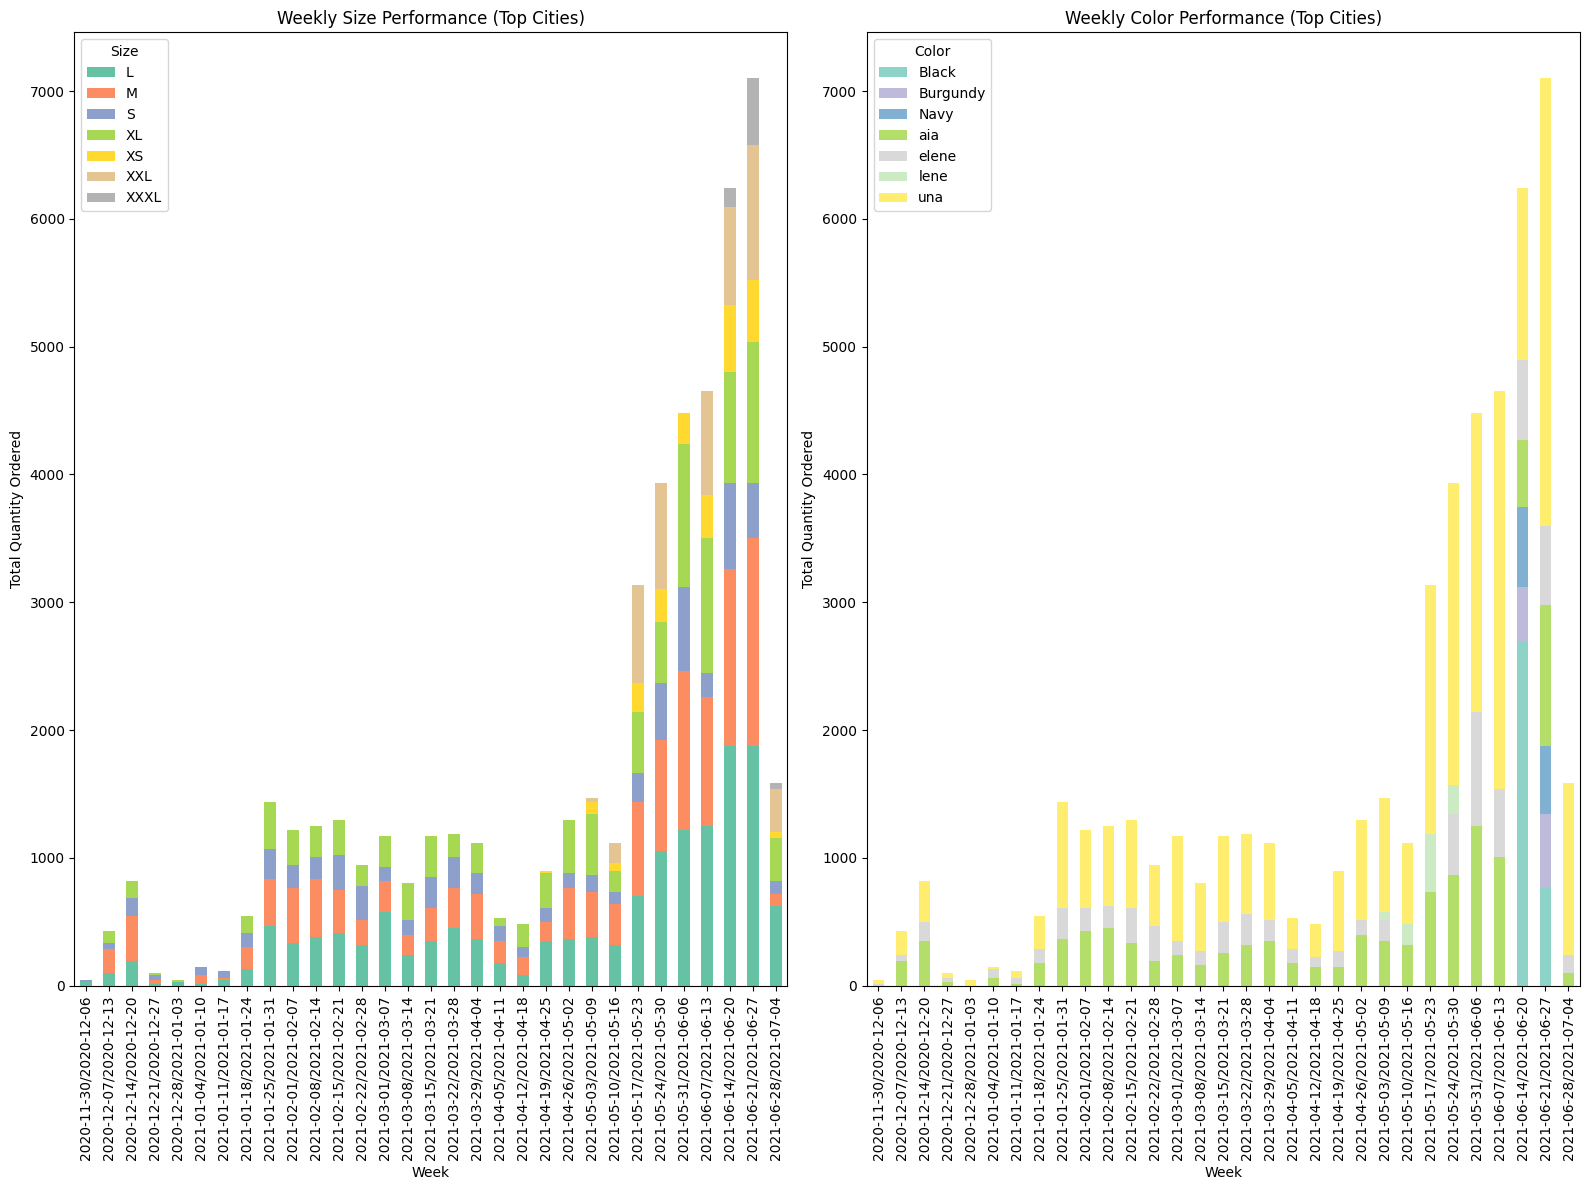

In [234]:

# Group data by week, size, color, and city
data['Week'] = data.index.to_period('W')  # Add a week column for weekly analysis
weekly_performance_size = data.groupby(['Week', 'Shipping City', 'Size'])['Lineitem quantity'].sum().reset_index()
weekly_performance_color = data.groupby(['Week', 'Shipping City', 'Color'])['Lineitem quantity'].sum().reset_index()

# Identify top-performing cities based on total quantity ordered
top_cities = data.groupby('Shipping City')['Lineitem quantity'].sum().nlargest(5).index

# Filter data for top-performing cities
top_cities_size = weekly_performance_size[weekly_performance_size['Shipping City'].isin(top_cities)]
top_cities_color = weekly_performance_color[weekly_performance_color['Shipping City'].isin(top_cities)]

# Create subplots with a 2x2 grid (2 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 12))  # Change this to (2, 2) if you want a 2x2 grid

# Plot 3: Stacked bar chart by size (weekly performance)
pivot_size = top_cities_size.pivot_table(index='Week', columns='Size', values='Lineitem quantity', aggfunc='sum')

# Plot stacked bar chart for weekly size performance
pivot_size.plot(kind='bar', stacked=True, ax=axes[0], cmap='Set2')
axes[0].set_title('Weekly Size Performance (Top Cities)')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Total Quantity Ordered')
axes[0].legend(title='Size')

# Plot 4: Stacked bar chart by color (weekly performance)
pivot_color = top_cities_color.pivot_table(index='Week', columns='Color', values='Lineitem quantity', aggfunc='sum')

# Plot stacked bar chart for weekly color performance
pivot_color.plot(kind='bar', stacked=True, ax=axes[1], cmap='Set3')
axes[1].set_title('Weekly Color Performance (Top Cities)')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Total Quantity Ordered')
axes[1].legend(title='Color')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()